# **Hyperparameter tuning**

In [1]:
import os

import pandas as pd

from utils import plots, constants

## **Constants**

In [2]:
TUNING_FOLDER = constants.TUNING_FOLDER
LVL1_RESULTS = os.path.join(TUNING_FOLDER, 'lvl1.csv')
LVL2_RESULTS = os.path.join(TUNING_FOLDER, 'lvl2.csv')
LVL3_RESULTS = os.path.join(TUNING_FOLDER, 'lvl3.csv')

## **Level 1**

In [3]:
lvl1_df = pd.read_csv(LVL1_RESULTS)
lvl1_df.tail()

date                  model_name           source  \
315  2023-07-26 14:07:36.626009  es_gn_lvl1_transformer.npz  valid_es.txt.es   
316  2023-07-26 14:08:53.427986  es_gn_lvl1_transformer.npz  valid_es.txt.es   
317  2023-07-26 14:08:53.427986  es_gn_lvl1_transformer.npz  valid_es.txt.es   
318  2023-07-26 14:10:18.711054  es_gn_lvl1_transformer.npz  valid_es.txt.es   
319  2023-07-26 14:10:18.711054  es_gn_lvl1_transformer.npz  valid_es.txt.es   

              target             score_type      score  epoch  \
315  valid_gn.txt.gn  sacrebleu_corpus_bleu   2.614965      8   
316  valid_gn.txt.gn  sacrebleu_corpus_chrf  18.309891      9   
317  valid_gn.txt.gn  sacrebleu_corpus_bleu   2.817177      9   
318  valid_gn.txt.gn  sacrebleu_corpus_chrf  18.513704     10   
319  valid_gn.txt.gn  sacrebleu_corpus_bleu   2.899490     10   

                                            parameters  
315  {'devices': ['0', '1'], 'early-stopping': ['7'...  
316  {'devices': ['0', '1'], 'early-stopping': ['7'...  
317  {'devices': ['0', '1'], 'early-stopping': ['7'...  
318  {'devices': ['0', '1'], 'early-stopping': ['7'...  
319  {'devices': ['0', '1'], 'early-stopping': ['7'...

**Visual analysis**

In [4]:
gn_es_results = lvl1_df[lvl1_df['source'].str.contains('gn', regex=False)]
es_gn_results = lvl1_df[lvl1_df['source'].str.contains('es', regex=False)]

### **GN -> ES**

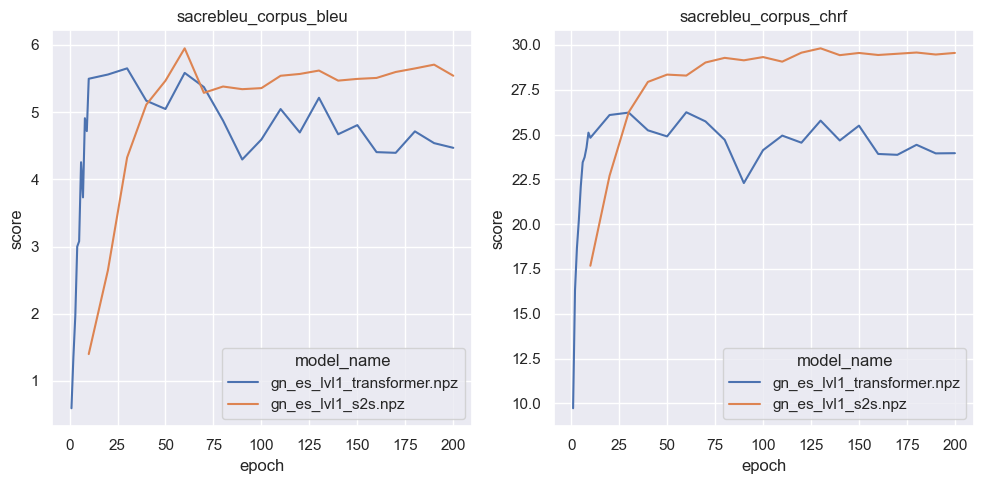

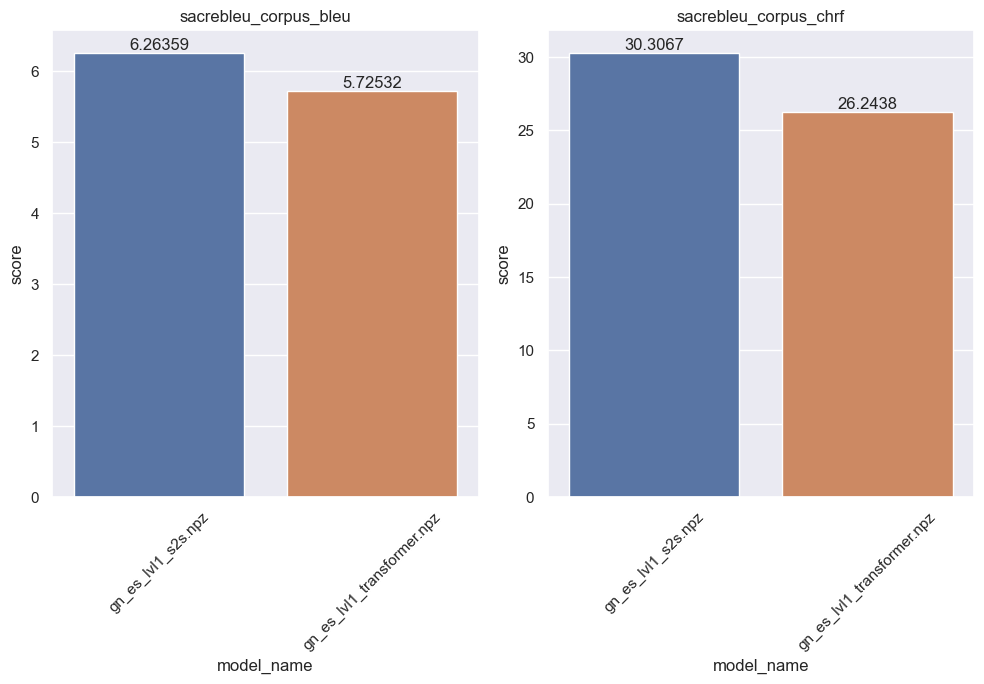

In [5]:
plots.plot_metric_by_epoch_foreach_model(gn_es_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,5));
plots.plot_max_score_by_model(gn_es_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,7));

### **ES -> GN**

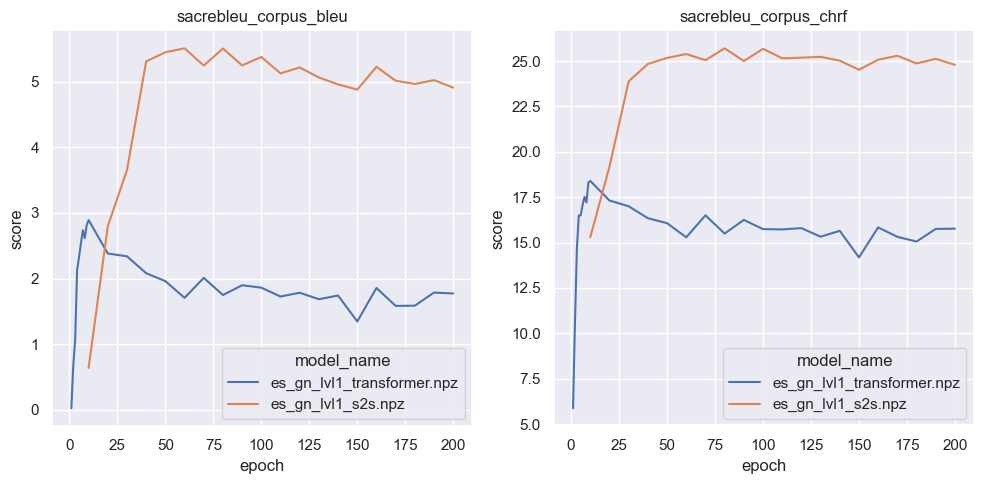

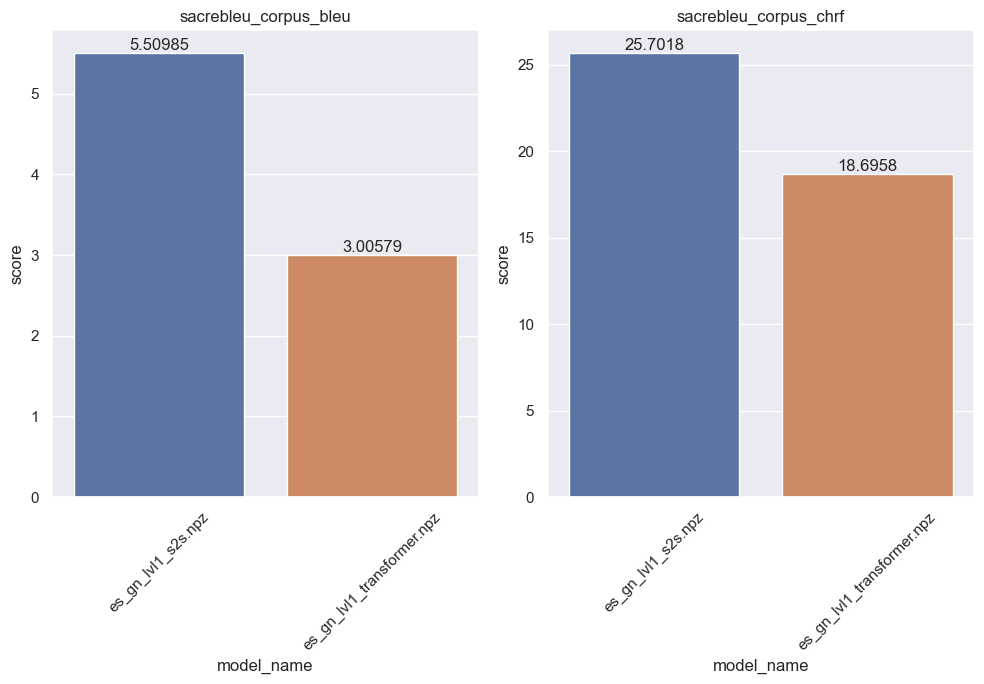

In [6]:
plots.plot_metric_by_epoch_foreach_model(es_gn_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,5));
plots.plot_max_score_by_model(es_gn_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(10,7));

## **Level 2**

In [7]:
lvl2_df = pd.read_csv(LVL2_RESULTS)
lvl2_df.tail()

date  \
1563  2023-08-04 18:50:13.247111   
1564  2023-08-04 19:39:19.335075   
1565  2023-08-04 19:39:19.335075   
1566  2023-08-04 20:28:25.415945   
1567  2023-08-04 20:28:25.415945   

                                             model_name           source  \
1563  lvl2_grid_gn_es_s2s_from15_to16_max-length_200...  valid_gn.txt.gn   
1564  lvl2_grid_gn_es_s2s_from15_to16_max-length_200...  valid_gn.txt.gn   
1565  lvl2_grid_gn_es_s2s_from15_to16_max-length_200...  valid_gn.txt.gn   
1566  lvl2_grid_gn_es_s2s_from15_to16_max-length_200...  valid_gn.txt.gn   
1567  lvl2_grid_gn_es_s2s_from15_to16_max-length_200...  valid_gn.txt.gn   

               target             score_type      score  epoch  \
1563  valid_es.txt.es  sacrebleu_corpus_bleu  15.481119    380   
1564  valid_es.txt.es  sacrebleu_corpus_chrf  36.378641    390   
1565  valid_es.txt.es  sacrebleu_corpus_bleu  15.409644    390   
1566  valid_es.txt.es  sacrebleu_corpus_chrf  36.290605    400   
1567  valid_es.txt.es  sacrebleu_corpus_bleu  15.194003    400   

                                             parameters  
1563  {'type': ['s2s'], 'devices': ['0'], 'train-set...  
1564  {'type': ['s2s'], 'devices': ['0'], 'train-set...  
1565  {'type': ['s2s'], 'devices': ['0'], 'train-set...  
1566  {'type': ['s2s'], 'devices': ['0'], 'train-set...  
1567  {'type': ['s2s'], 'devices': ['0'], 'train-set...

In [8]:
gn_es_lvl2_results = lvl2_df[lvl2_df['source'].str.contains('gn', regex=False)]
es_gn_lvl2_results = lvl2_df[lvl2_df['source'].str.contains('es', regex=False)]

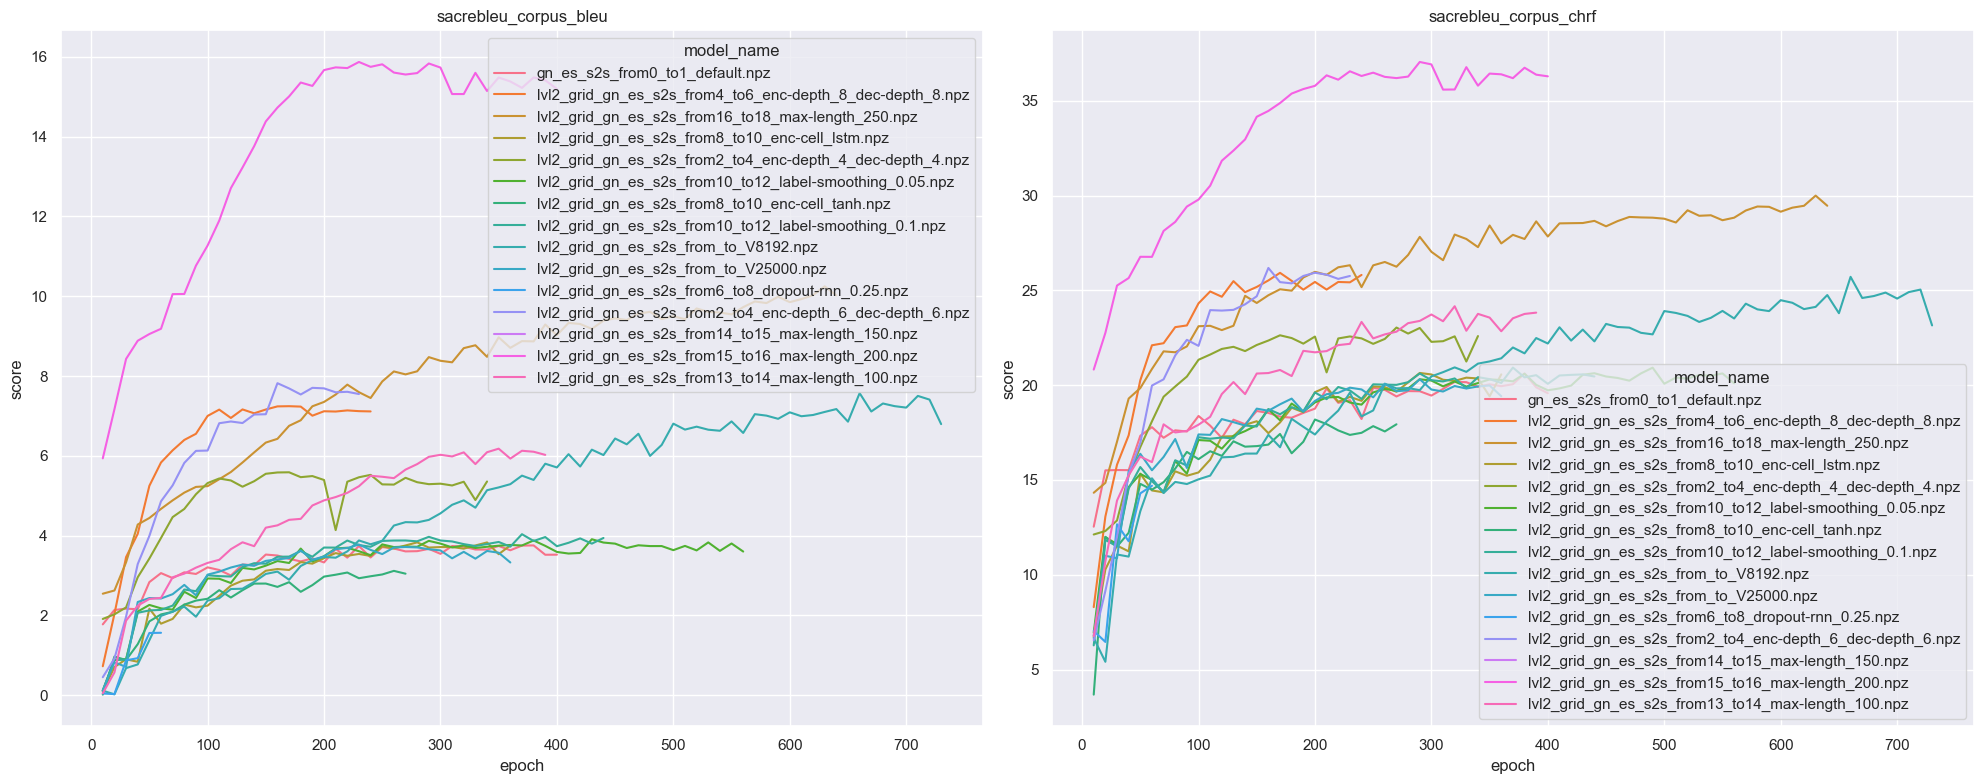

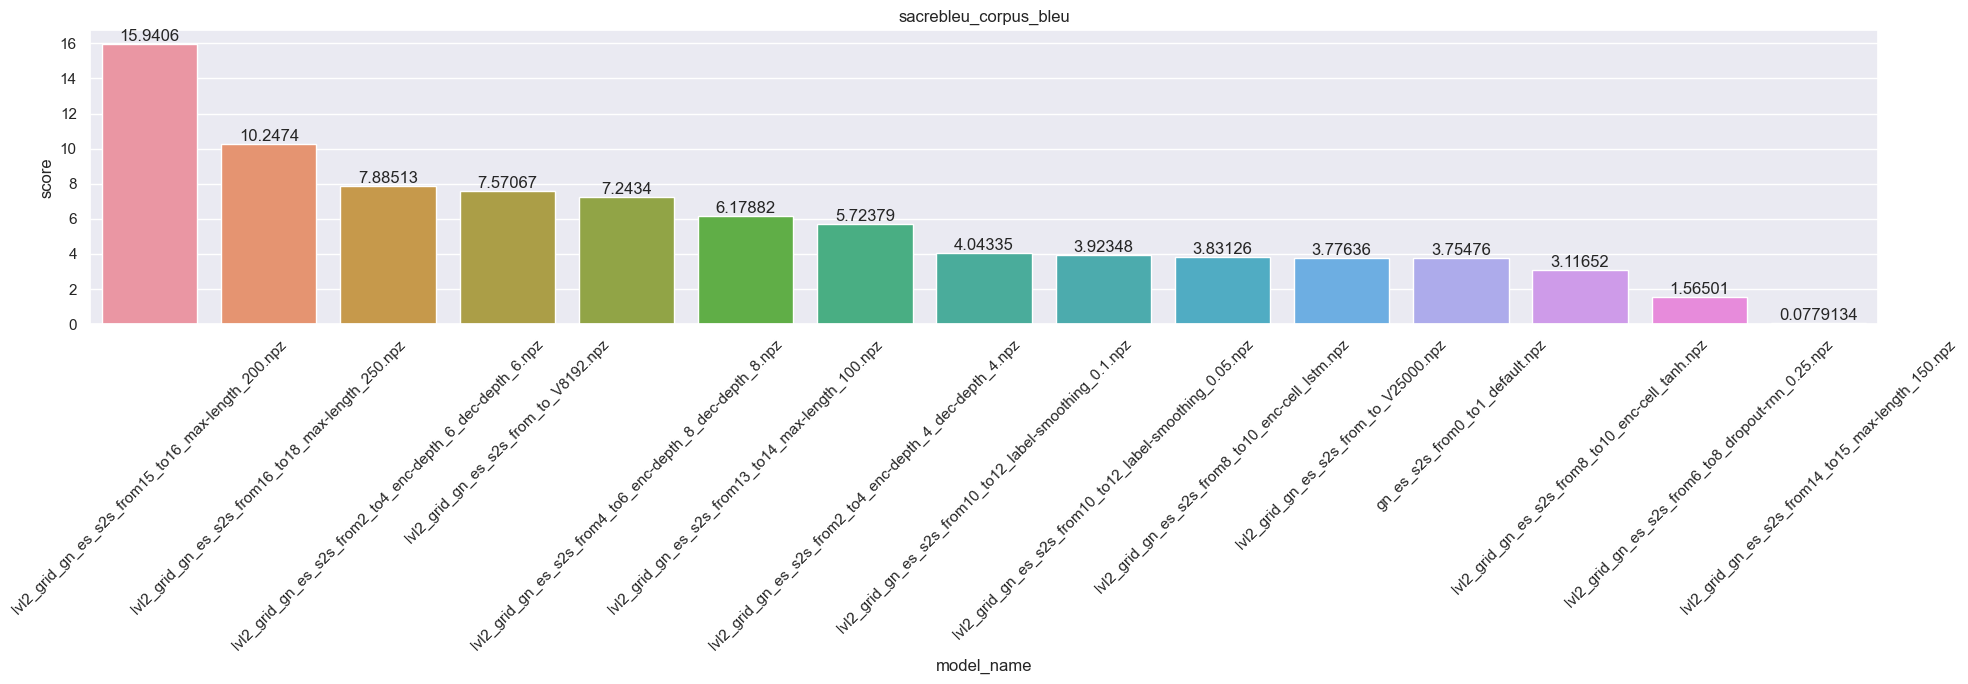

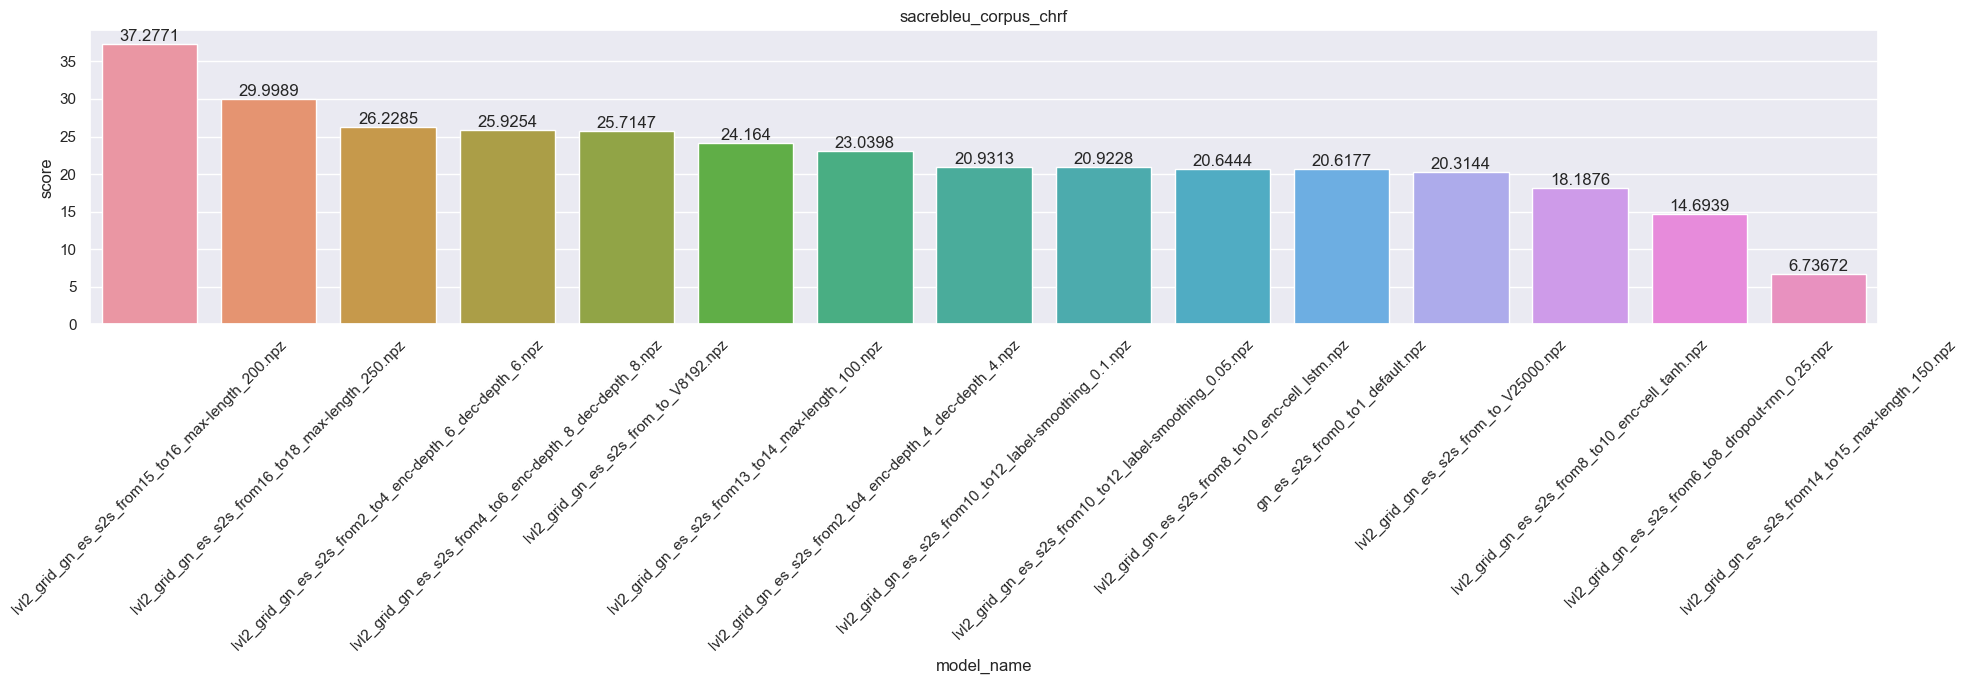

In [9]:
plots.plot_metric_by_epoch_foreach_model(gn_es_lvl2_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(20,8));
plots.plot_max_score_by_model(gn_es_lvl2_results, metrics=['sacrebleu_corpus_bleu'], figsize=(20,7));
plots.plot_max_score_by_model(gn_es_lvl2_results, metrics=['sacrebleu_corpus_chrf'], figsize=(20,7));

### **Level 2 metrics by hyperparameter**

```
- (enc-depth, dec-depth):   [(1, 1) {default}, (2, 2), (4, 4), (6, 6), (8, 8)]
- dropout-rnn:              [0 {default}, 0.25, 0.5]
- enc-cell:                 ["lstm", "tanh", "gru" {default}]
- sentencepiece-dim-vocabs: [2^13, 2^14 {our default}, 2^15]
- label-smoothing:          [0 {default}, 0.05, 0.1]
- max-length:               [100, 150, 200, 250]
- crop-max-length:          [true {our default}]

```

In [10]:
def extract_features(lvl1_df: pd.DataFrame, lvl2_df: pd.DataFrame, feature: str, column='parameters'):
    filtered_df = lvl2_df[lvl2_df[column].str.contains(feature)]
    default_df = lvl2_df[lvl2_df['model_name'].str.contains('default')]
    filtered_df = pd.concat([default_df, filtered_df])
    #lvl1_results = lvl1_df[lvl1_df['model_name'].str.contains('lvl1')]
    #filtered_df = pd.concat([filtered_df, lvl1_results])

    return filtered_df

#### **GN -> ES**

##### **Seq2Seq**

In [11]:
from utils import plots

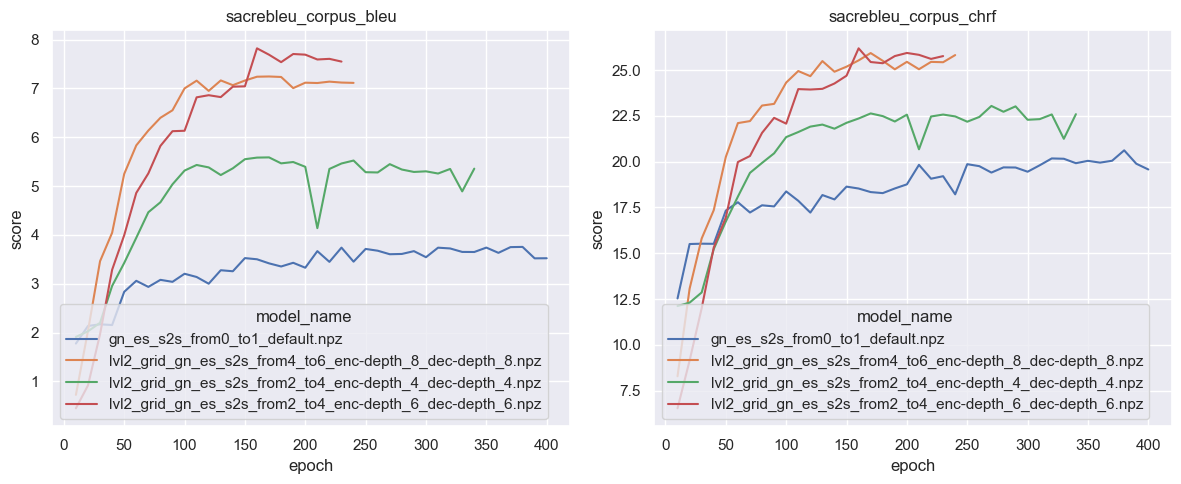

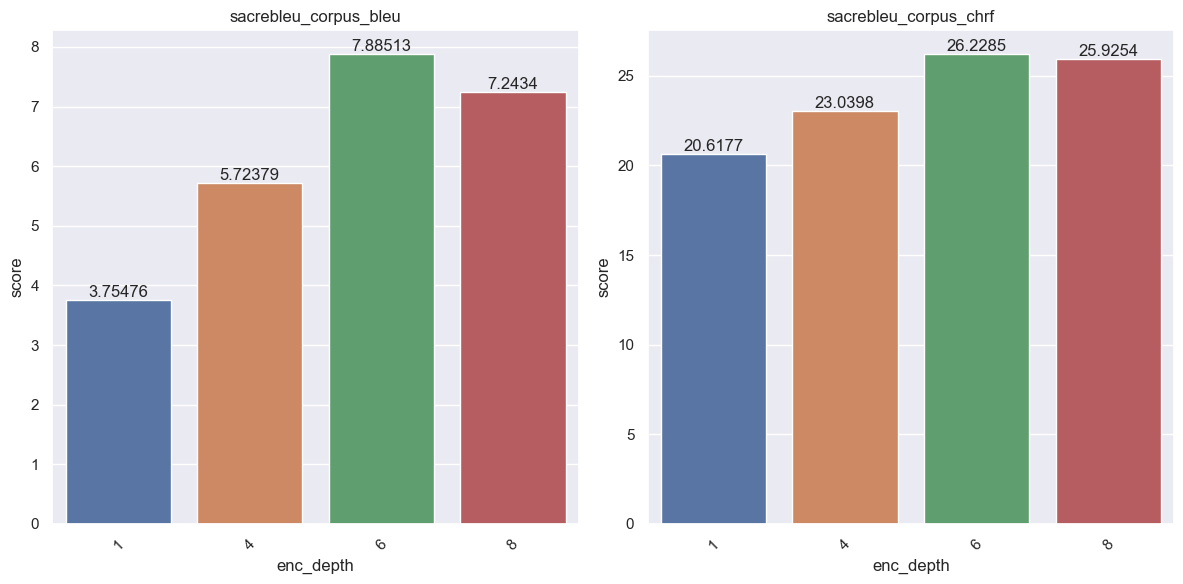

In [12]:
enc_dec_depth_df = extract_features(gn_es_results, gn_es_lvl2_results, 'enc-depth')
plots.plot_metric_by_epoch_foreach_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
enc_dec_depth_df_sorted_by_depth = enc_dec_depth_df.copy()
enc_dec_depth_df_sorted_by_depth['enc_depth'] = [int(x[-5]) if 'enc-depth' in x else 1 for x in enc_dec_depth_df_sorted_by_depth['model_name']]
plots.plot_max_score_by_model(enc_dec_depth_df_sorted_by_depth, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,6), x_col='enc_depth', sort_by='enc_depth', ascending=True);


**Dropout RNN**

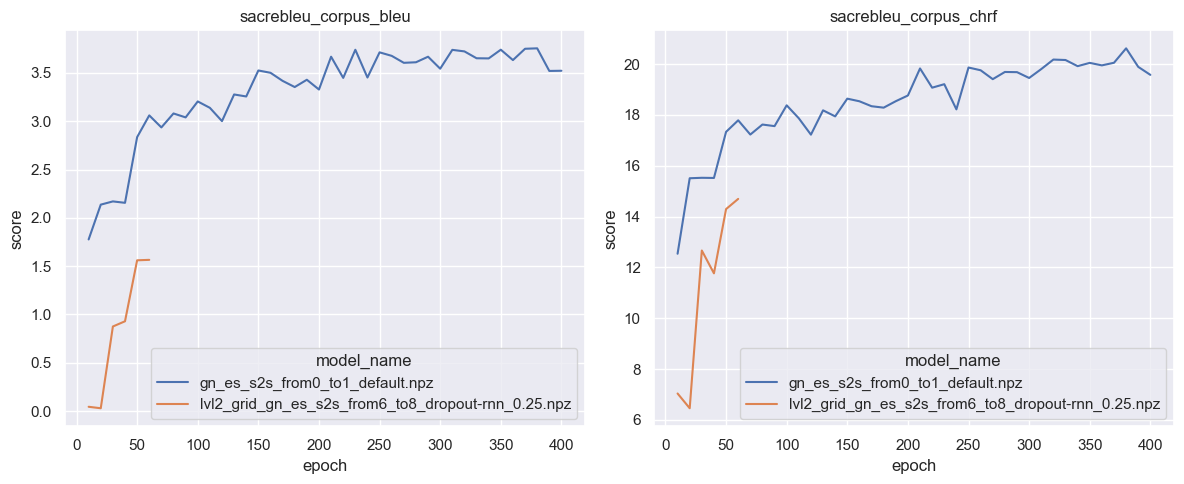

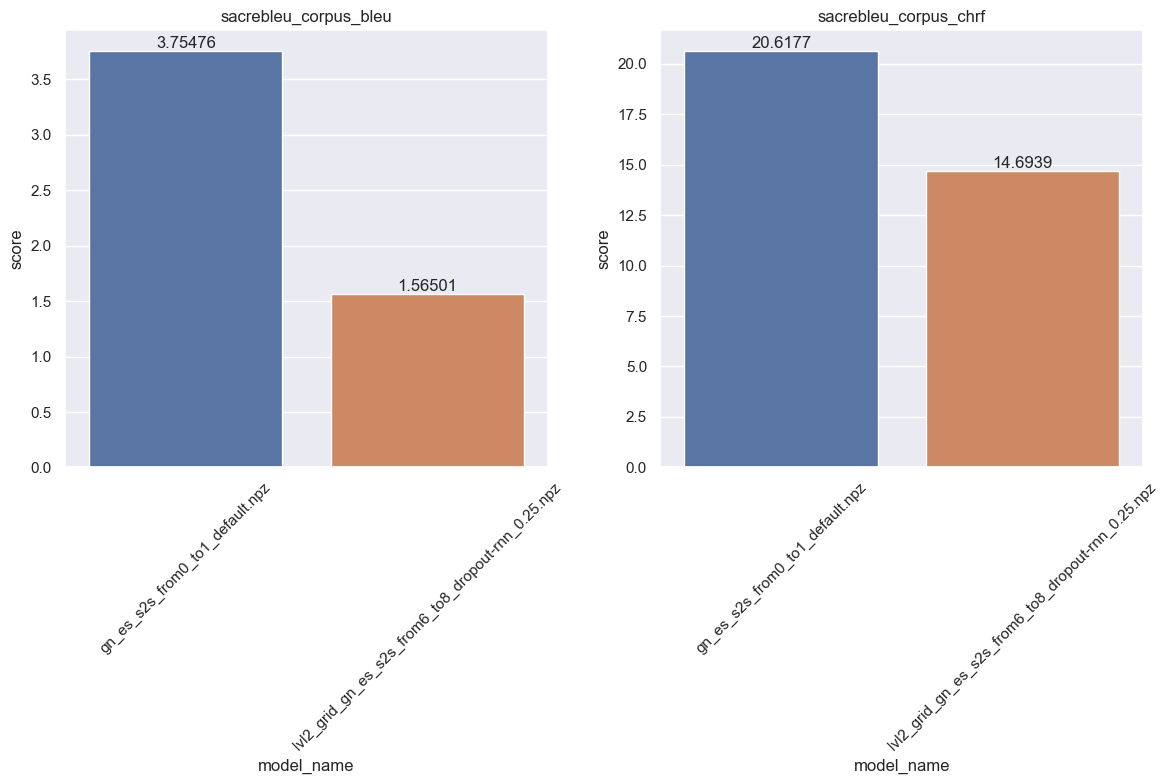

In [13]:
enc_dec_depth_df = extract_features(gn_es_results, gn_es_lvl2_results, 'dropout-rnn', column="model_name")
plots.plot_metric_by_epoch_foreach_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
plots.plot_max_score_by_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,8));

**Encoder Cell**

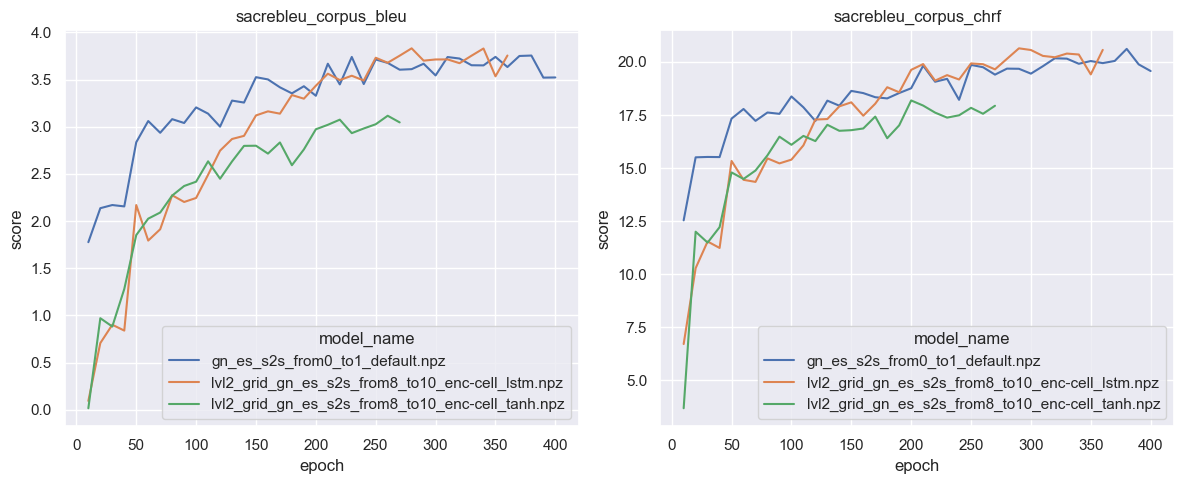

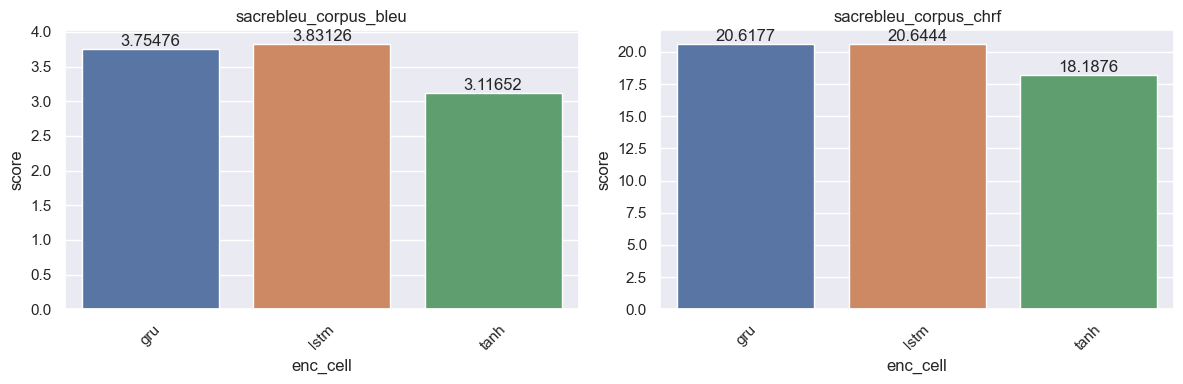

In [14]:
enc_cell_df = extract_features(gn_es_results, gn_es_lvl2_results, 'enc-cell')
plots.plot_metric_by_epoch_foreach_model(enc_cell_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
enc_cell_df['enc_cell'] = [x[-8:-4] if 'enc-cell' in x else 'gru' for x in enc_cell_df['model_name']]
plots.plot_max_score_by_model(enc_cell_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,4), x_col='enc_cell', sort_by='enc_cell', ascending=True);

**Sentence Piece Vocab Size**

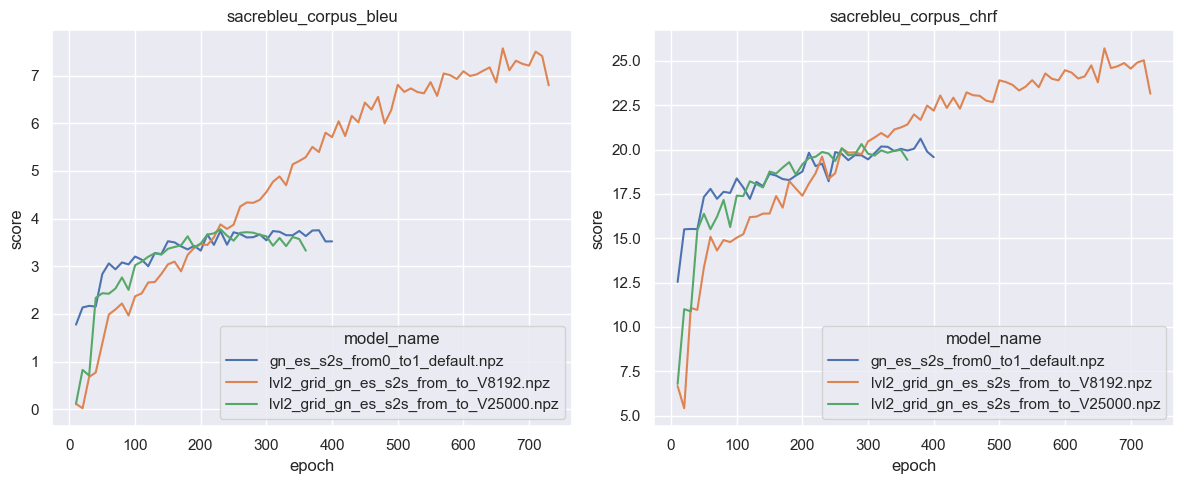

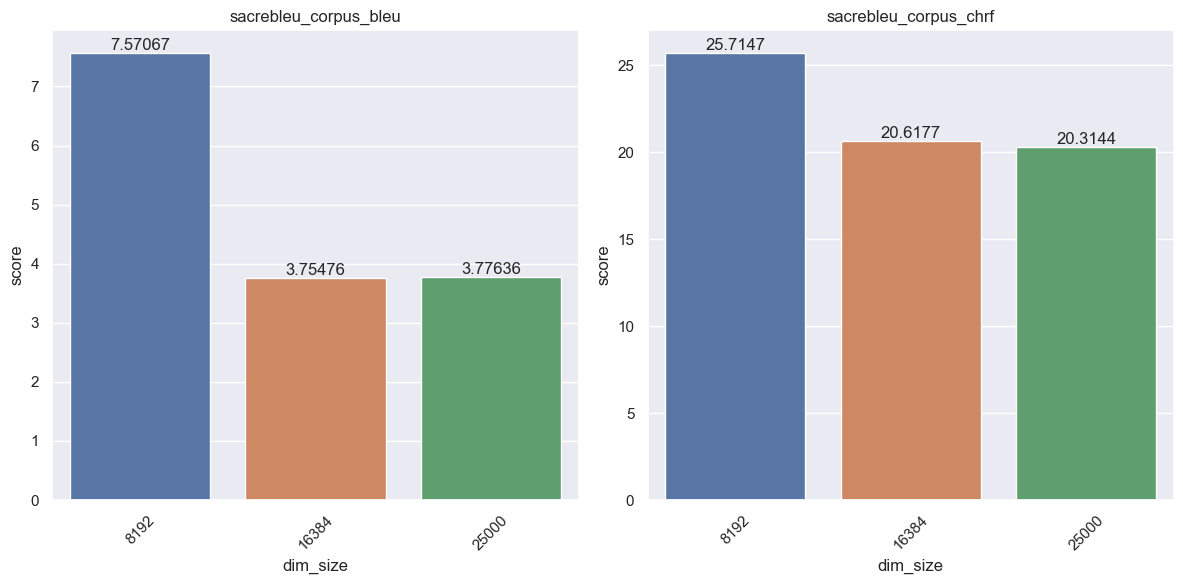

In [15]:
dim_size_df = extract_features(gn_es_results, gn_es_lvl2_results, '_V', column='model_name')
plots.plot_metric_by_epoch_foreach_model(dim_size_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
dim_size_df['dim_size'] = [int(x[-9:-4].replace('V','')) if 'V' in x else 2**14 for x in dim_size_df['model_name']]
plots.plot_max_score_by_model(dim_size_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,6), x_col='dim_size', sort_by='dim_size', ascending=True);

**Label smoothing**

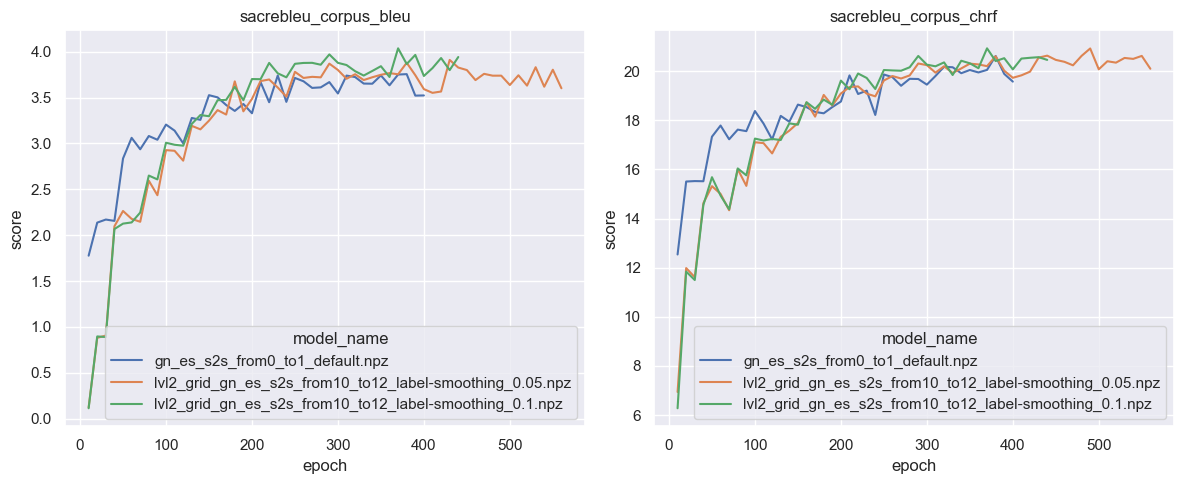

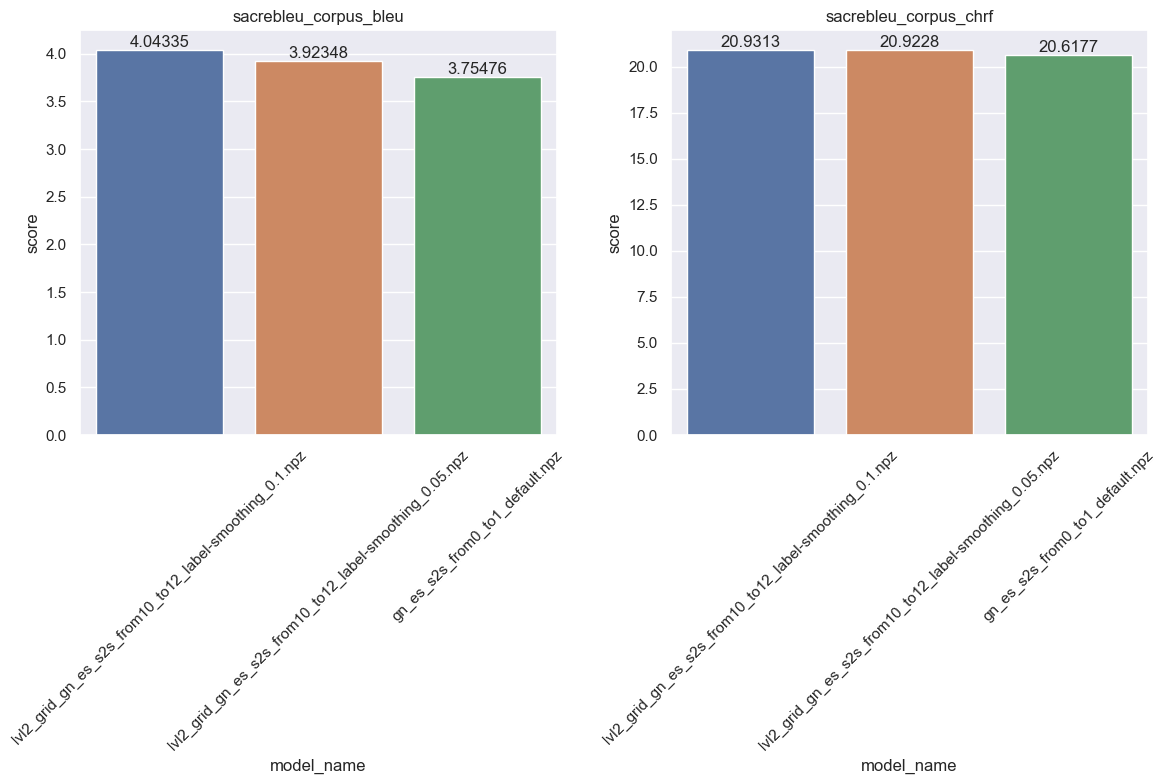

In [16]:
enc_dec_depth_df = extract_features(gn_es_results, gn_es_lvl2_results, 'label-smoothing')
plots.plot_metric_by_epoch_foreach_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
plots.plot_max_score_by_model(enc_dec_depth_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,8));

**Sentence max length**

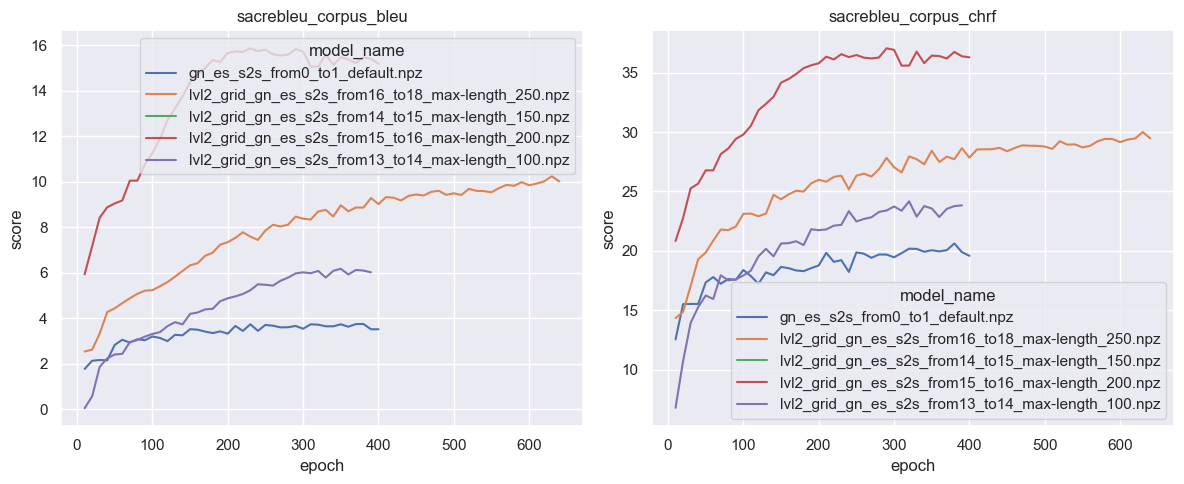

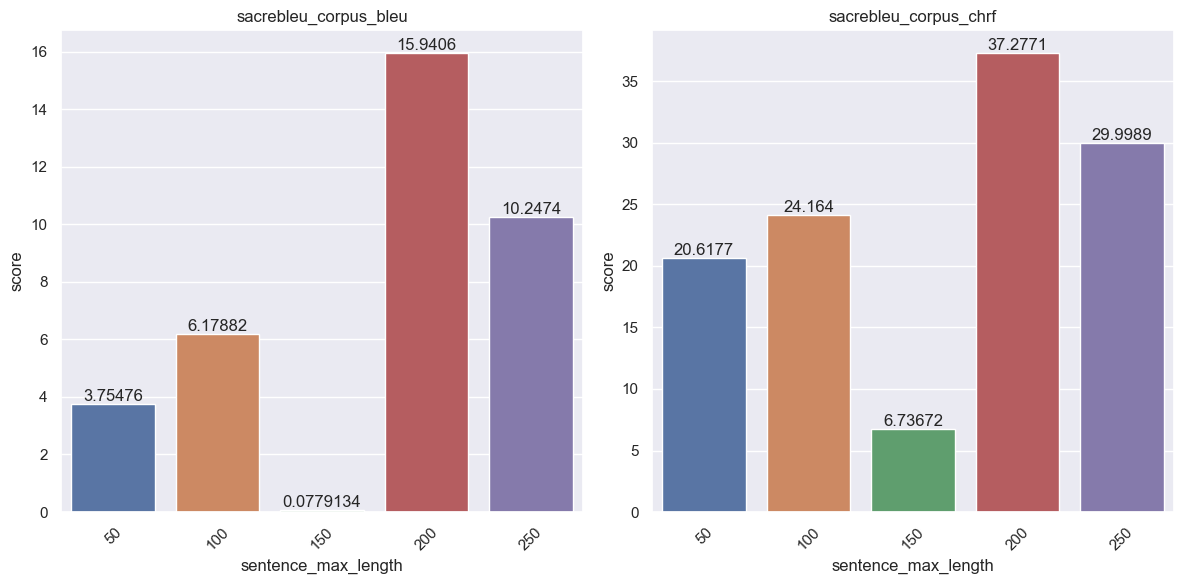

In [17]:
sentence_max_length_df = extract_features(gn_es_results, gn_es_lvl2_results, 'max-length', column='model_name')
plots.plot_metric_by_epoch_foreach_model(sentence_max_length_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,5));
sentence_max_length_df['sentence_max_length'] = [int(x[-7:-4]) if 'max-length' in x else 50 for x in sentence_max_length_df['model_name']]
plots.plot_max_score_by_model(sentence_max_length_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(12,6), x_col='sentence_max_length', sort_by='sentence_max_length', ascending=True);

## **Level 3**

In [69]:
lvl3_df = pd.read_csv(LVL3_RESULTS)
lvl3_df.tail()

date  \
947  2023-08-12 11:35:56.122680   
948  2023-08-12 12:08:38.255539   
949  2023-08-12 12:08:38.255539   
950  2023-08-12 12:23:09.606370   
951  2023-08-12 12:23:09.606370   

                                            model_name           source  \
947  lvl3_grid_gn_es_s2s_from16_to18_seed1234_learn...  valid_gn.txt.gn   
948  lvl3_grid_gn_es_s2s_from14_to16_seed1234_learn...  valid_gn.txt.gn   
949  lvl3_grid_gn_es_s2s_from14_to16_seed1234_learn...  valid_gn.txt.gn   
950  lvl3_grid_gn_es_s2s_from16_to18_seed1234_learn...  valid_gn.txt.gn   
951  lvl3_grid_gn_es_s2s_from16_to18_seed1234_learn...  valid_gn.txt.gn   

              target             score_type      score  epoch  \
947  valid_es.txt.es  sacrebleu_corpus_bleu  17.275892     90   
948  valid_es.txt.es  sacrebleu_corpus_chrf  45.438303    300   
949  valid_es.txt.es  sacrebleu_corpus_bleu  24.009865    300   
950  valid_es.txt.es  sacrebleu_corpus_chrf  32.245712    100   
951  valid_es.txt.es  sacrebleu_corpus_bleu  13.278184    100   

                                            parameters  
947  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
948  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
949  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
950  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
951  {'type': ['s2s'], 'max-length-crop': [], 'drop...

In [82]:
gn_es_lvl3_results = lvl3_df[lvl3_df['source'].str.contains('gn', regex=False)]
gn_es_lvl3_results = lvl3_df[lvl3_df['model_name'].str.contains('from6', regex=False)]
es_gn_lvl3_results = lvl3_df[lvl3_df['source'].str.contains('es', regex=False)]

```
(placeholder)

- (enc-depth, dec-depth):   [(1, 1) {default}, (2, 2), (4, 4), (6, 6), (8, 8)]
- dropout-rnn:              [0 {default}, 0.25, 0.5]
- enc-cell:                 ["lstm", "tanh", "gru" {default}]
- sentencepiece-dim-vocabs: [2^13, 2^14 {our default}, 2^15]
- label-smoothing:          [0 {default}, 0.05, 0.1]
- max-length:               [100, 150, 200, 250]
- crop-max-length:          [true {our default}]

```

##### **S2S: GN -> ES**

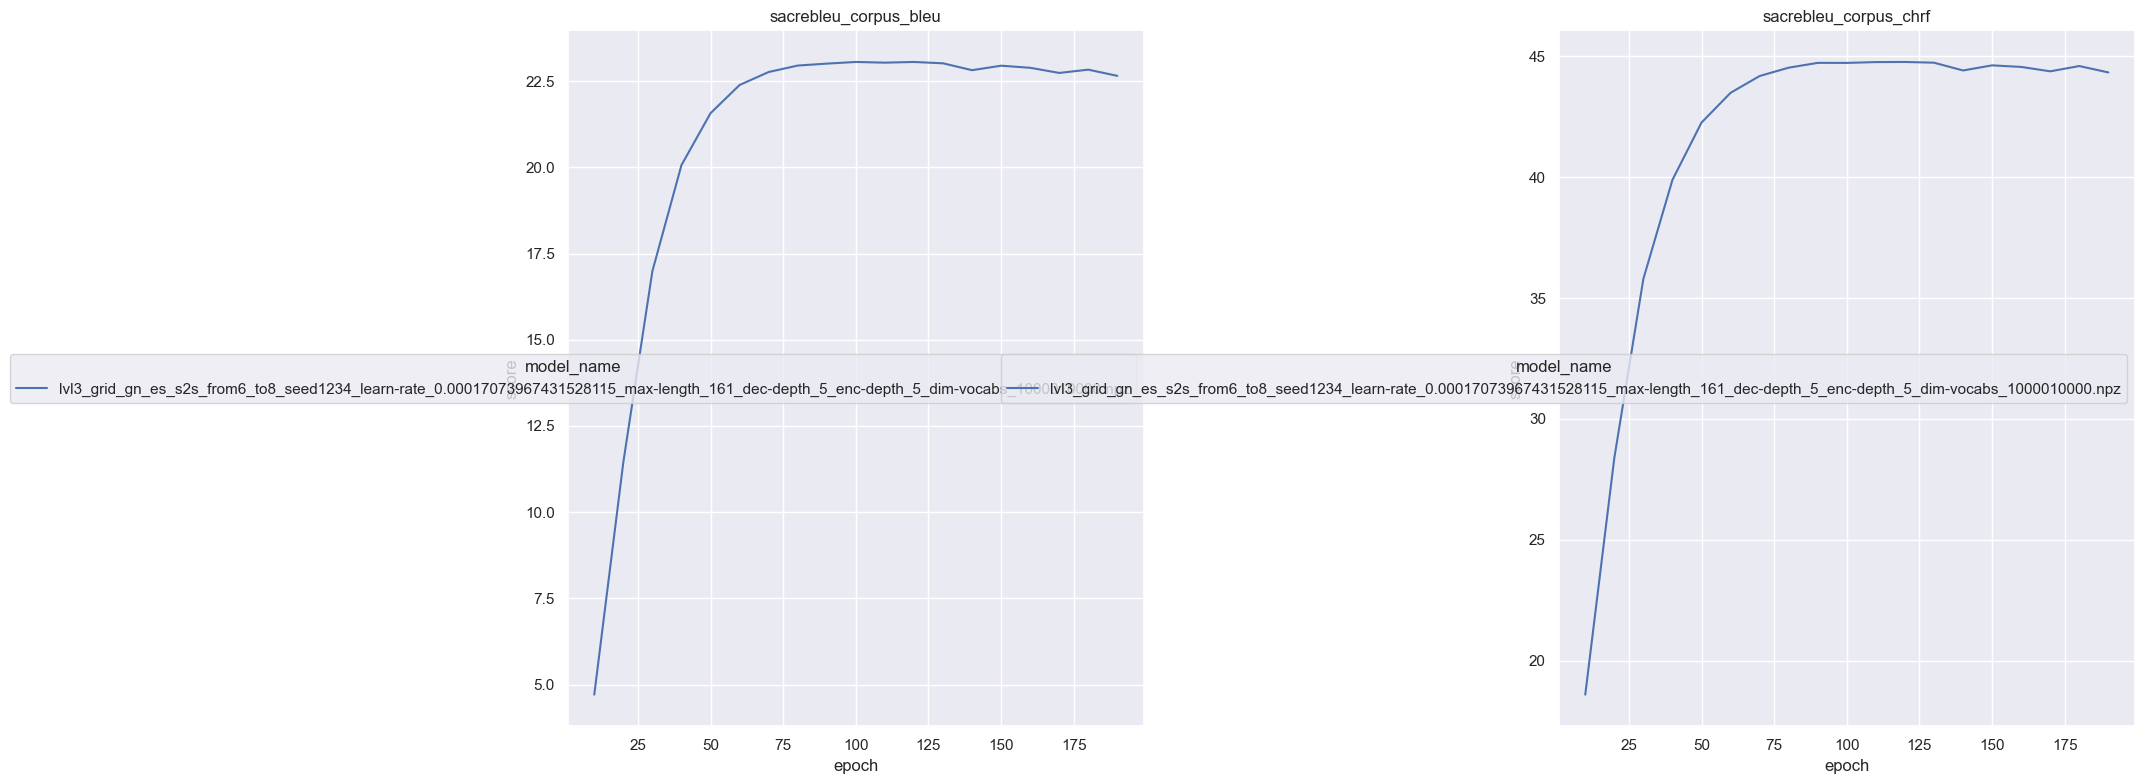

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


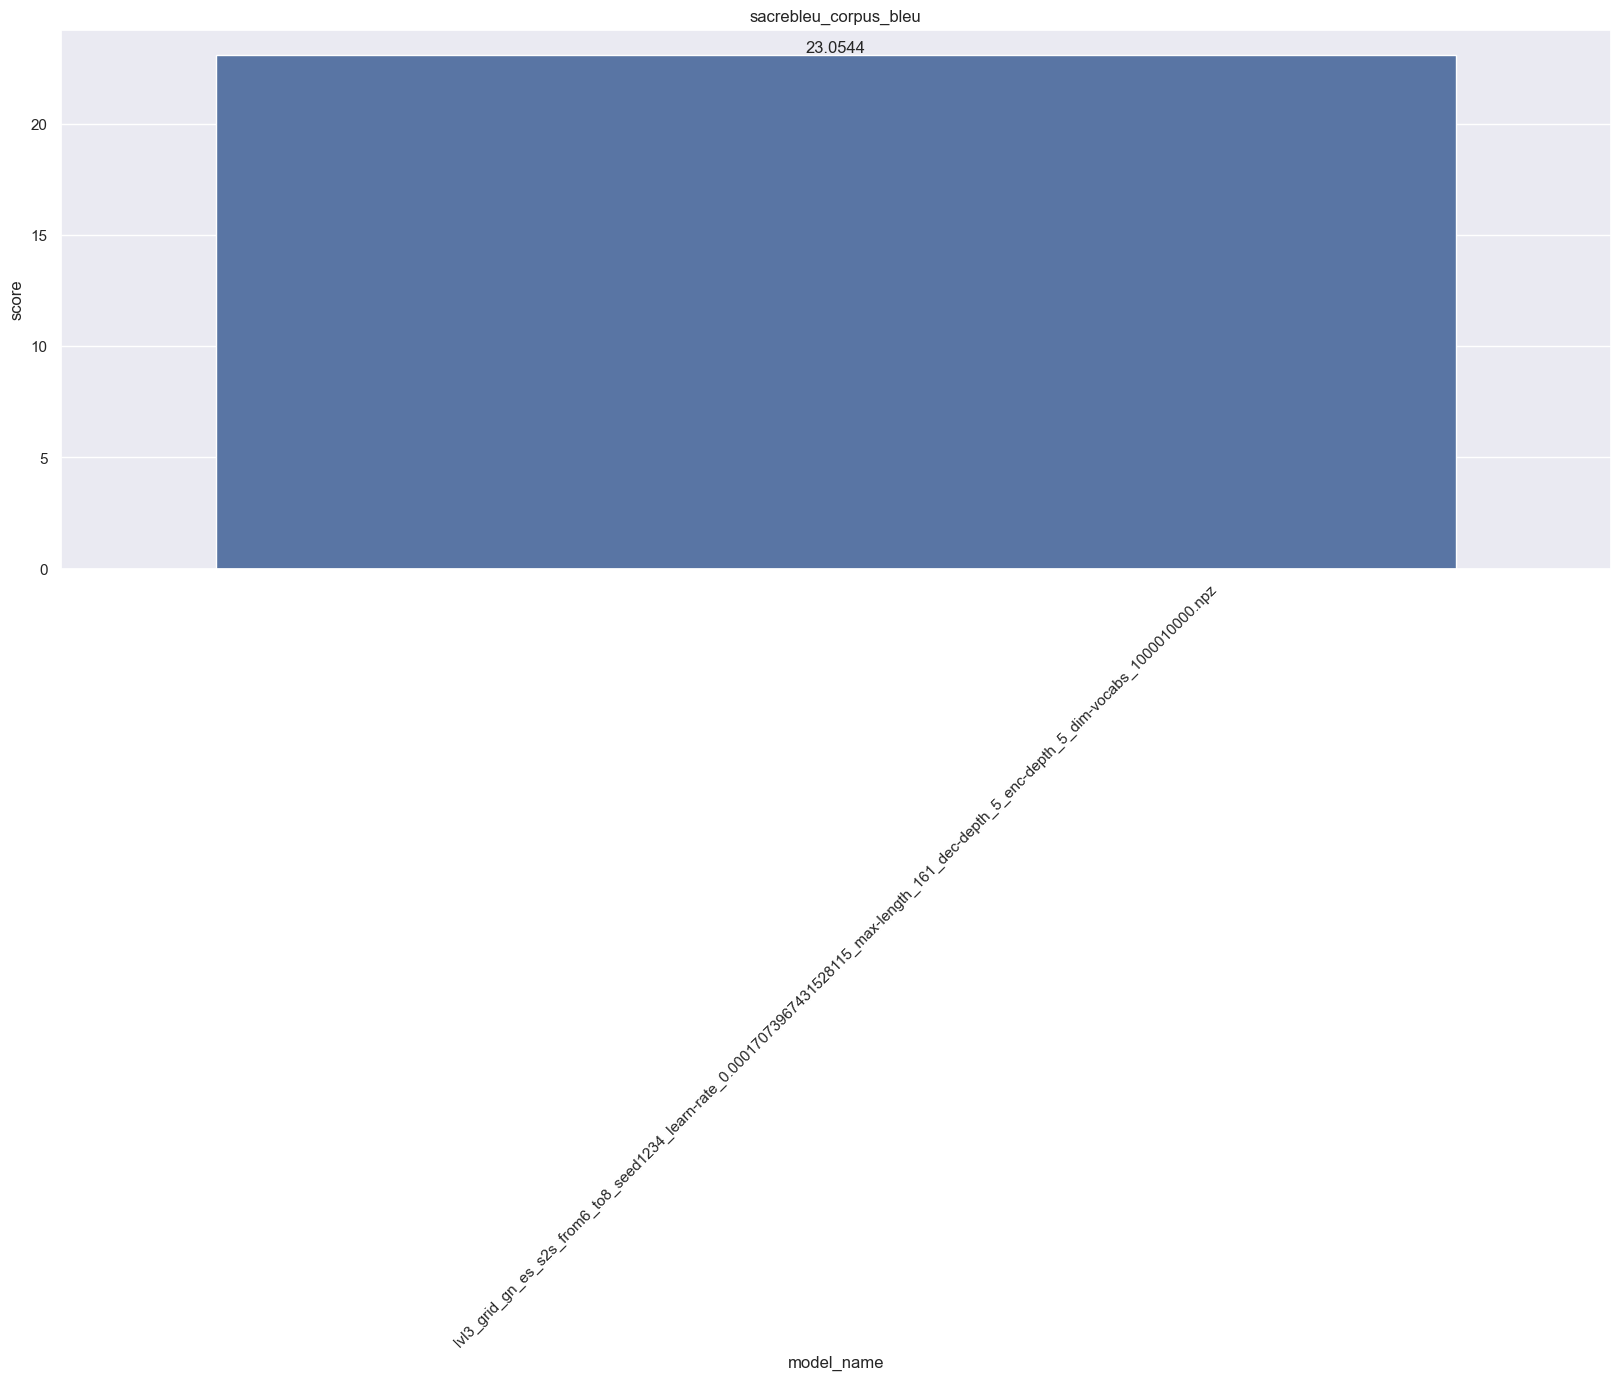

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


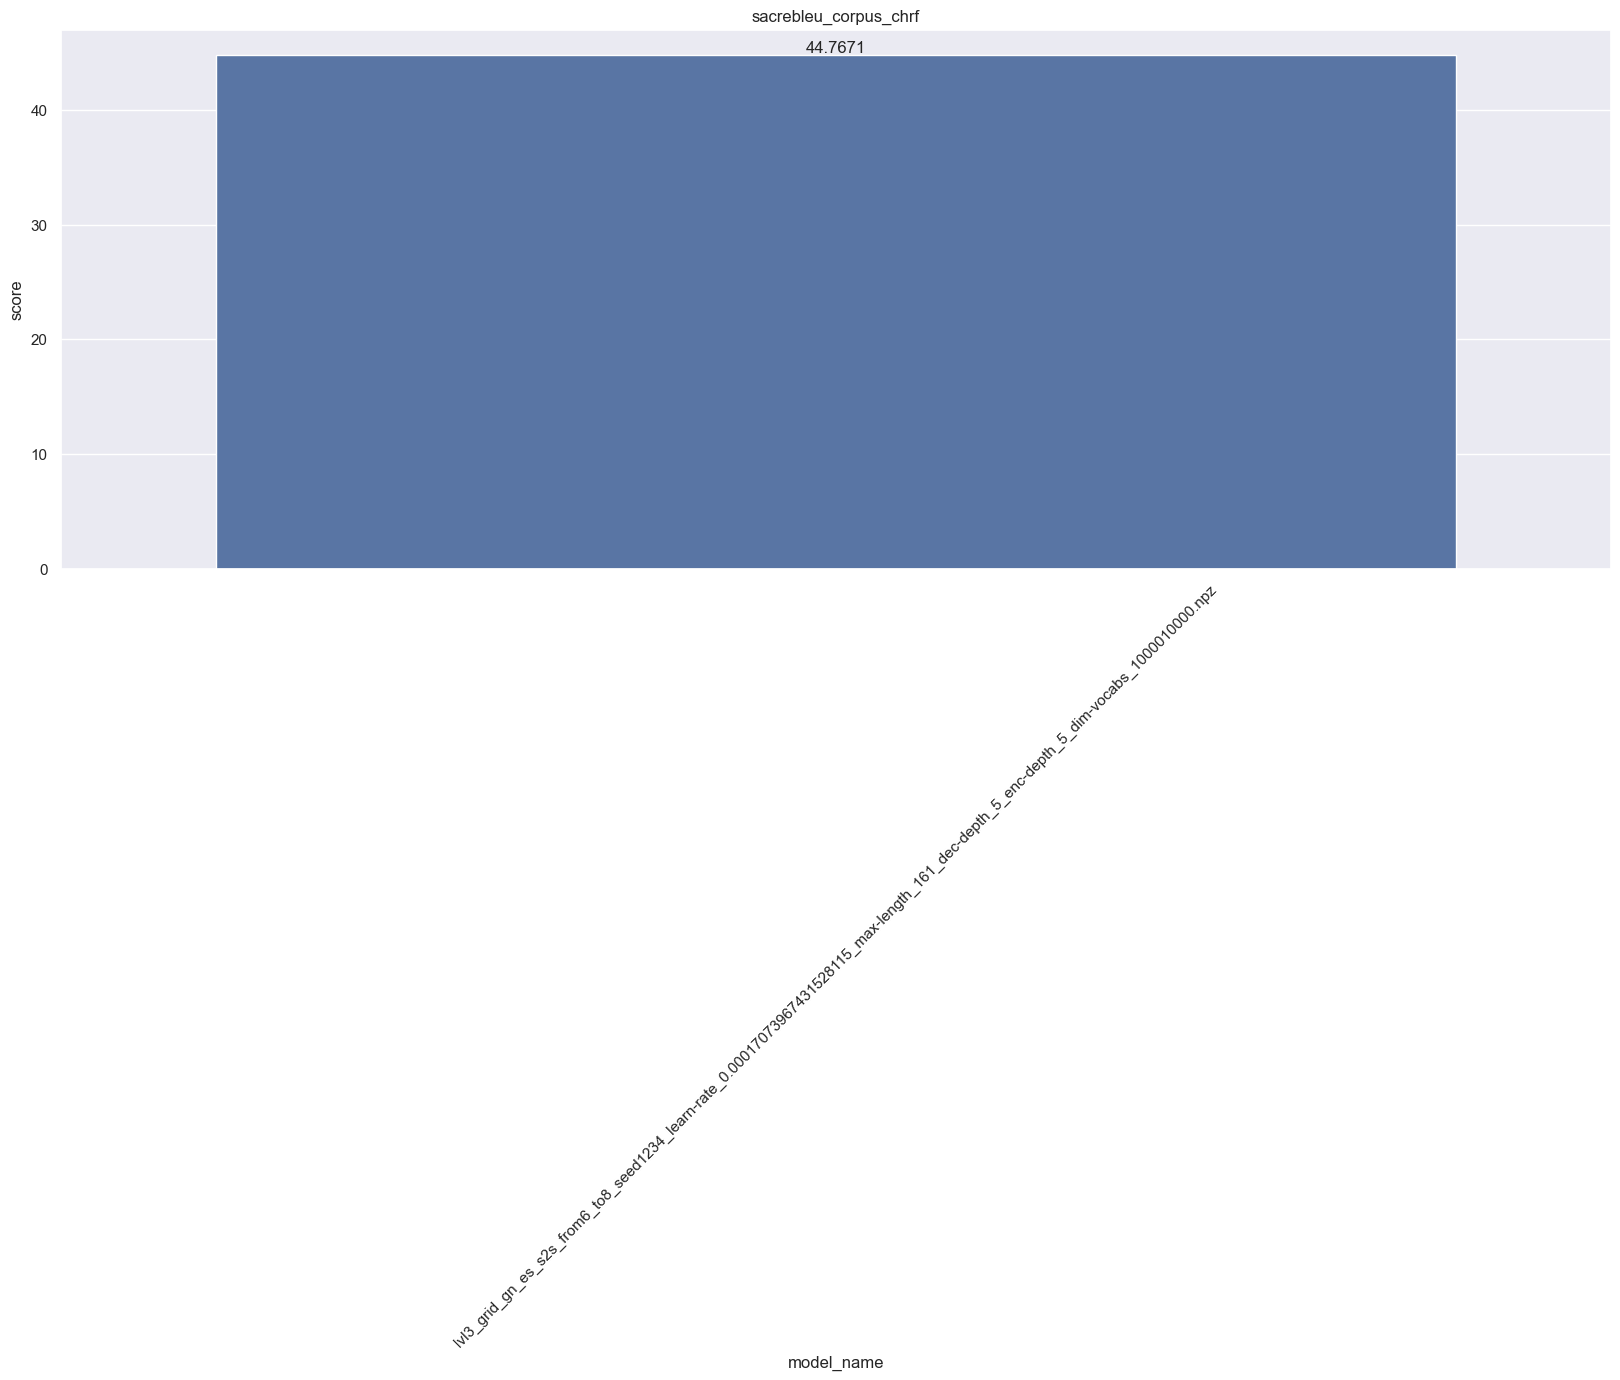

In [83]:
plots.plot_metric_by_epoch_foreach_model(gn_es_lvl3_results, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(20,8));
plots.plot_max_score_by_model(gn_es_lvl3_results, metrics=['sacrebleu_corpus_bleu'], figsize=(20,7));
plots.plot_max_score_by_model(gn_es_lvl3_results, metrics=['sacrebleu_corpus_chrf'], figsize=(20,7));

##### **Transformer**

**ES->GN**

In [84]:
LVL3_RESULTS_TRANSFORMER_GN_ES = os.path.join(TUNING_FOLDER, "lvl3_transformer_gn_es.csv")
lvl3_df_transformer_es_gn = pd.read_csv(LVL3_RESULTS_TRANSFORMER_GN_ES)
lvl3_df_transformer_es_gn = lvl3_df_transformer_es_gn[lvl3_df_transformer_es_gn['score'] > 3]
lvl3_df_transformer_es_gn.head()

date  \
1610  2023-08-13 08:11:09.506092   
1642  2023-08-13 08:21:35.337335   
1668  2023-08-13 08:32:12.686012   
1698  2023-08-13 08:42:12.773861   
1728  2023-08-13 08:52:52.781811   

                                             model_name           source  \
1610  lvl3_grid_es_gn_transformer_from4_to6_seed3088...  valid_es.txt.es   
1642  lvl3_grid_es_gn_transformer_from4_to6_seed3088...  valid_es.txt.es   
1668  lvl3_grid_es_gn_transformer_from4_to6_seed3088...  valid_es.txt.es   
1698  lvl3_grid_es_gn_transformer_from4_to6_seed3088...  valid_es.txt.es   
1728  lvl3_grid_es_gn_transformer_from4_to6_seed3088...  valid_es.txt.es   

               target             score_type      score  epoch  \
1610  valid_gn.txt.gn  sacrebleu_corpus_chrf   5.410731     10   
1642  valid_gn.txt.gn  sacrebleu_corpus_chrf   9.831230     20   
1668  valid_gn.txt.gn  sacrebleu_corpus_chrf   9.846674     30   
1698  valid_gn.txt.gn  sacrebleu_corpus_chrf  11.197757     40   
1728  valid_gn.txt.gn  sacrebleu_corpus_chrf  12.454658     50   

                                             parameters  
1610  {'type': ['transformer'], 'max-length-crop': [...  
1642  {'type': ['transformer'], 'max-length-crop': [...  
1668  {'type': ['transformer'], 'max-length-crop': [...  
1698  {'type': ['transformer'], 'max-length-crop': [...  
1728  {'type': ['transformer'], 'max-length-crop': [...

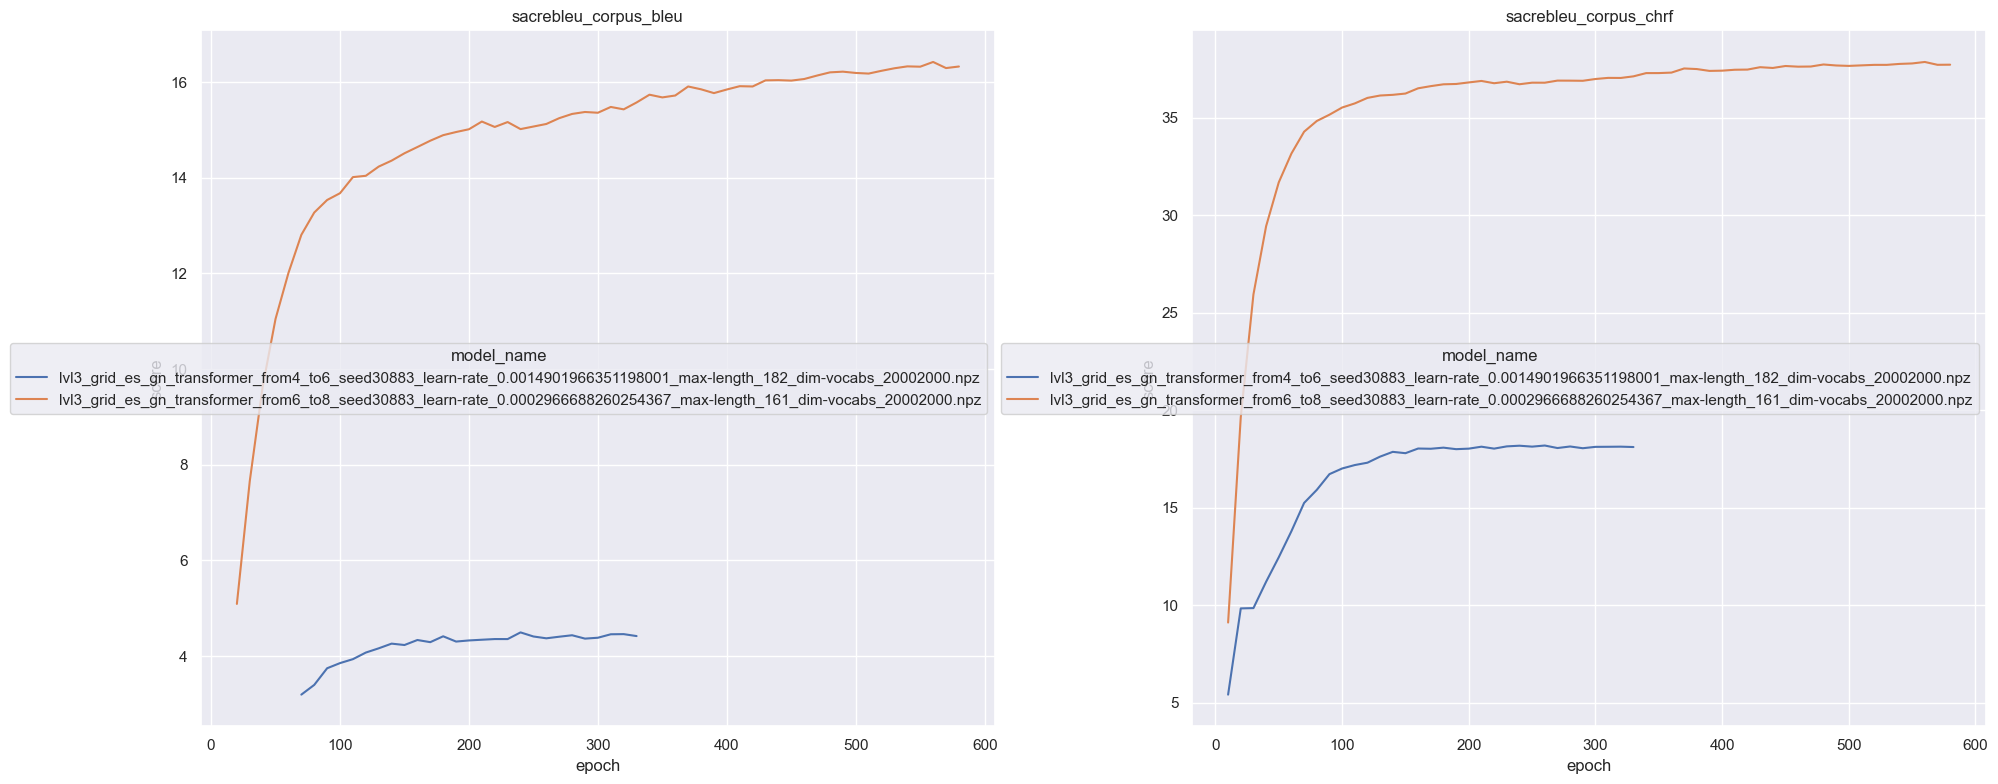

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


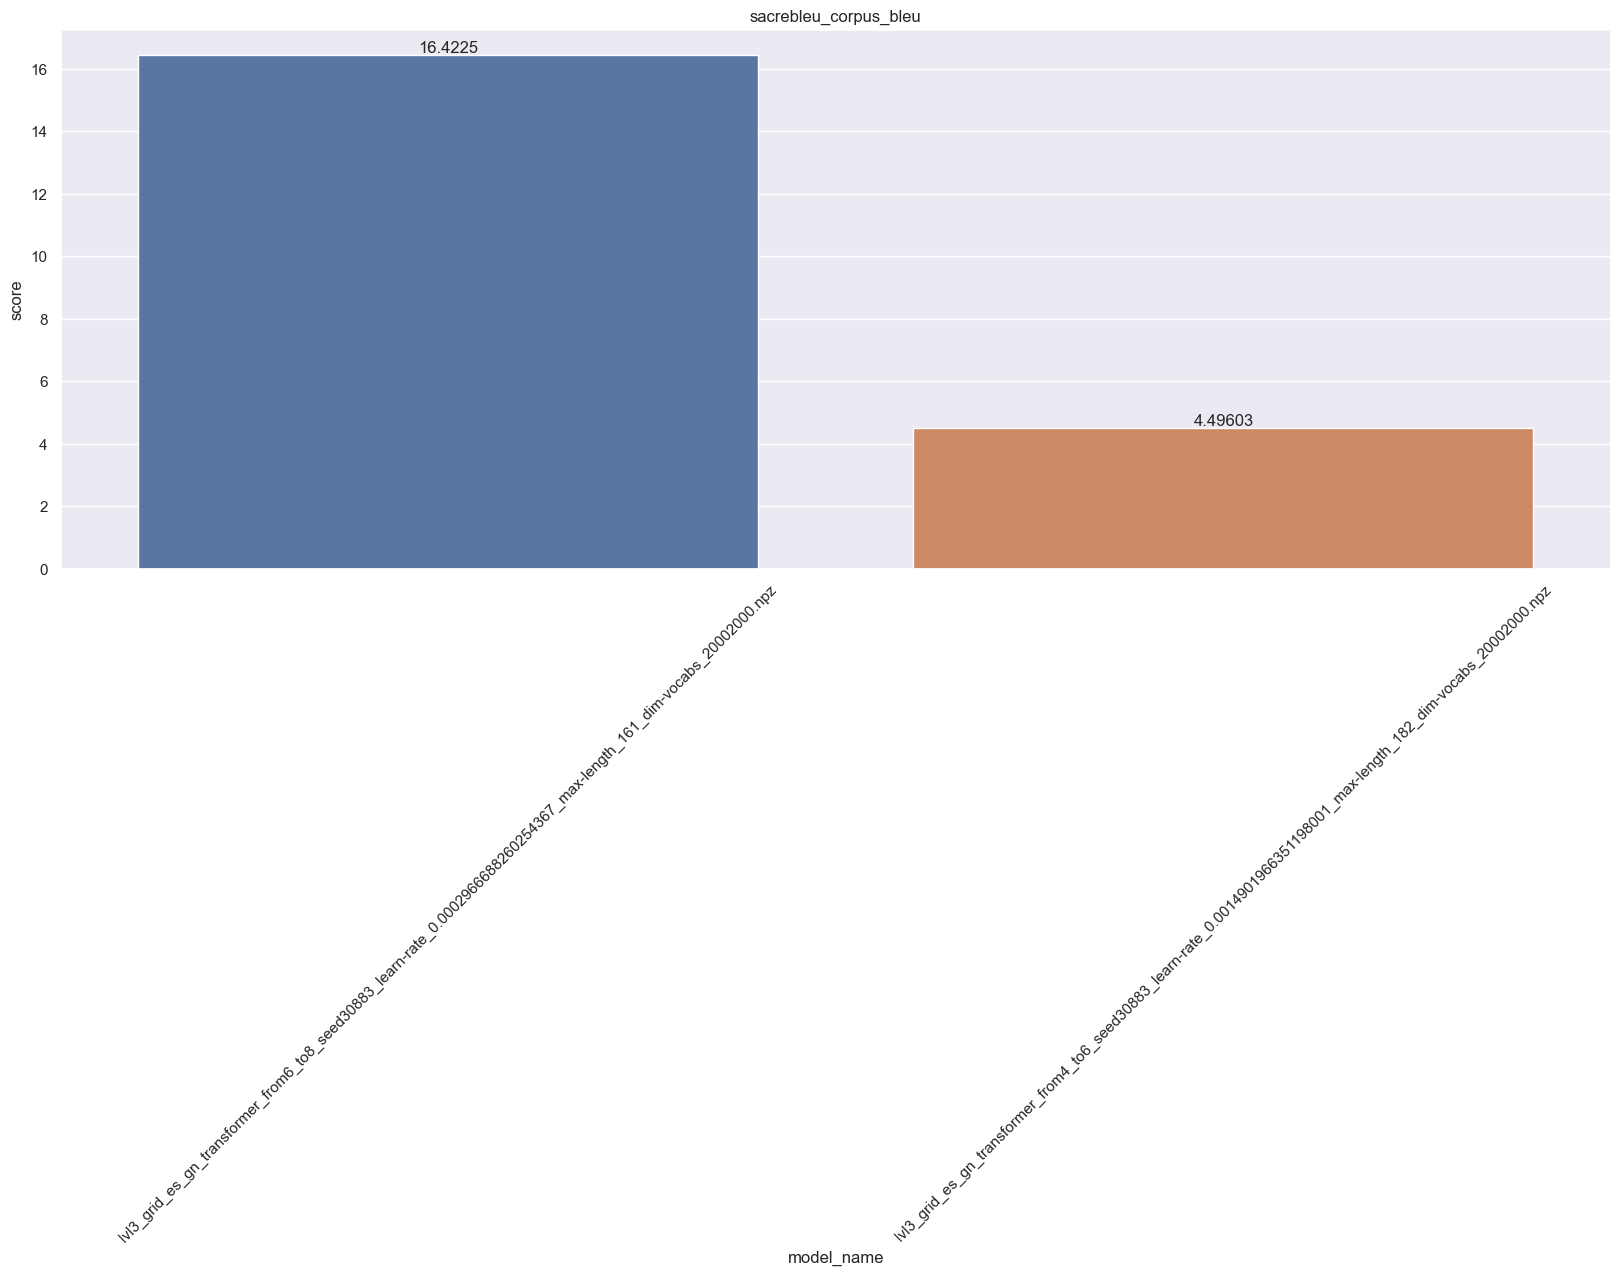

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


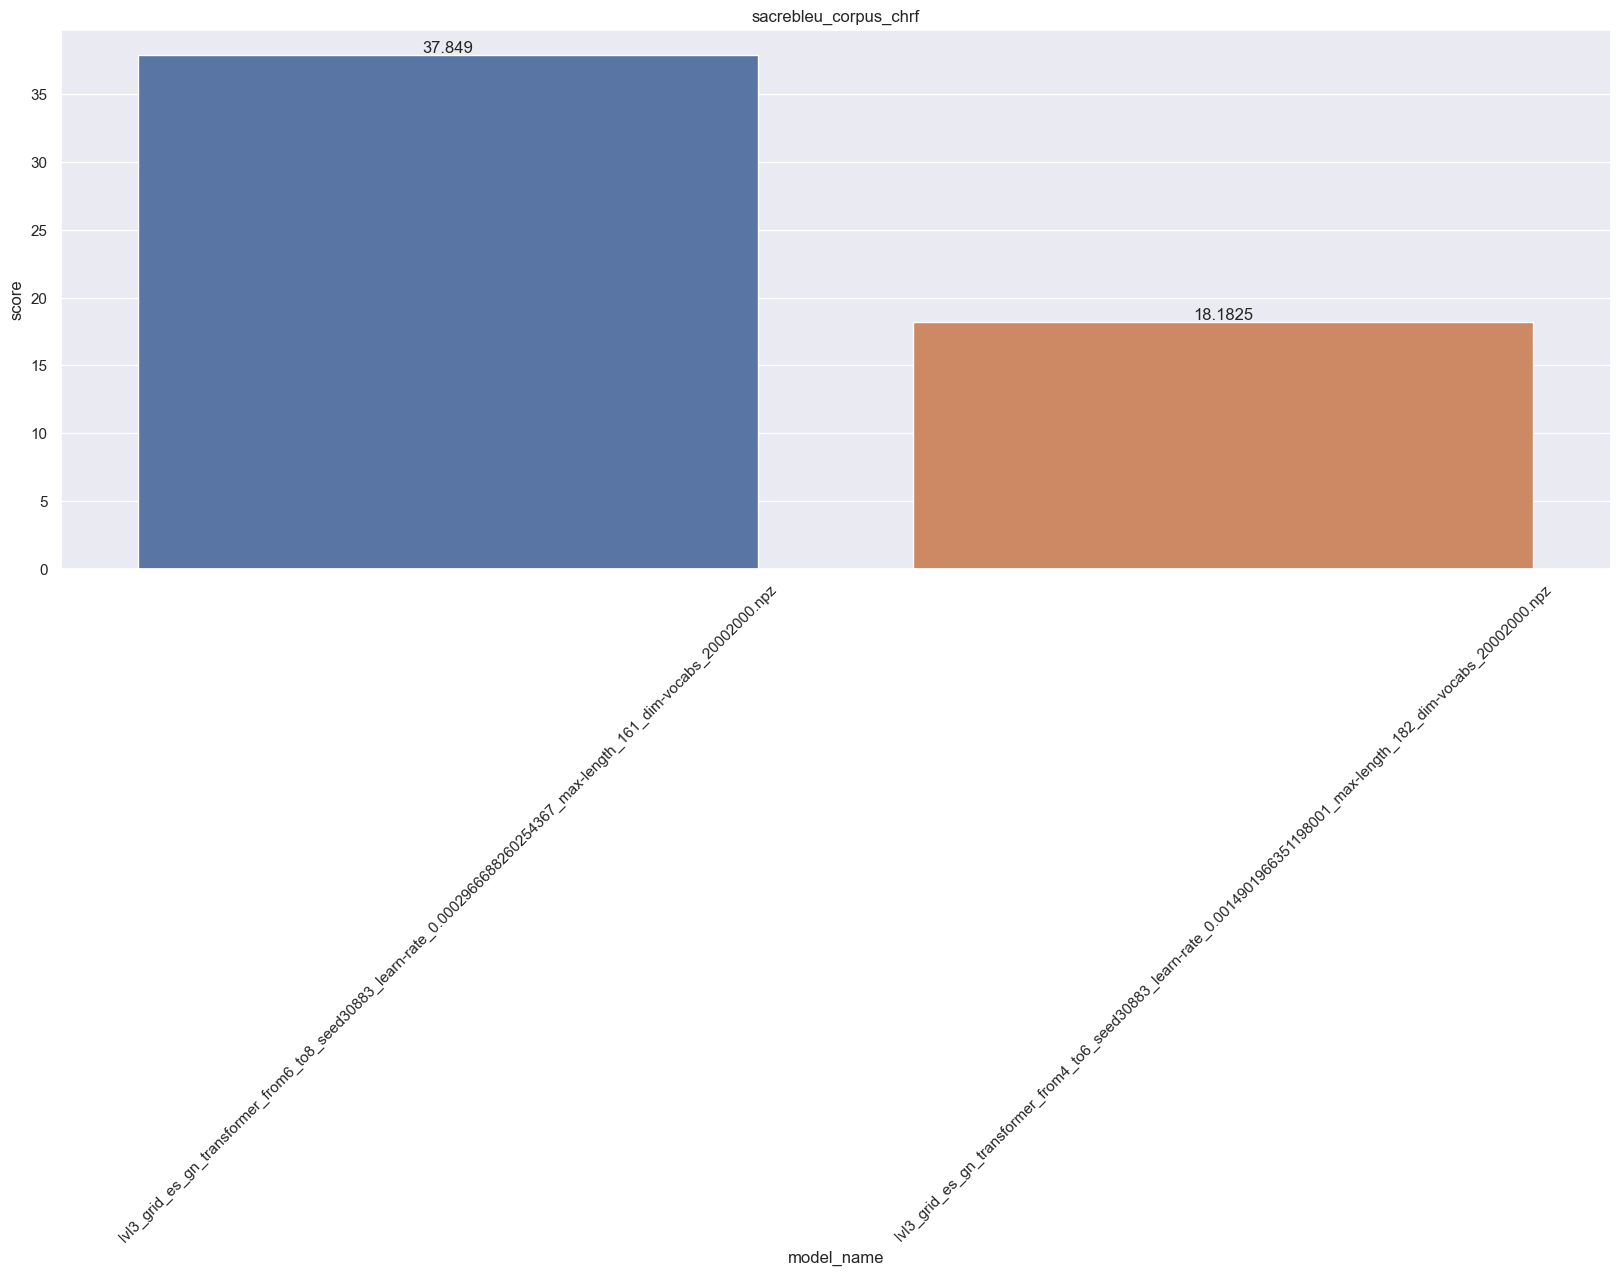

In [85]:
plots.plot_metric_by_epoch_foreach_model(lvl3_df_transformer_es_gn, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(20,8));
plots.plot_max_score_by_model(lvl3_df_transformer_es_gn, metrics=['sacrebleu_corpus_bleu'], figsize=(20,7));
plots.plot_max_score_by_model(lvl3_df_transformer_es_gn, metrics=['sacrebleu_corpus_chrf'], figsize=(20,7));

##### **S2S: ES -> GN**

In [88]:
LVL3_RESULTS_S2S_GN_ES = os.path.join(TUNING_FOLDER, "lvl3_s2s_es_gn.csv")
lvl3_df_s2s_es_gn = pd.read_csv(LVL3_RESULTS_S2S_GN_ES)
#lvl3_df_s2s_es_gn = lvl3_df_s2s_es_gn[lvl3_df_s2s_es_gn['score'] > 5]
lvl3_df_s2s_es_gn.head()

date  \
0  2023-08-10 12:54:34.560433   
1  2023-08-10 12:54:34.560433   
2  2023-08-10 12:59:56.609201   
3  2023-08-10 12:59:56.609201   
4  2023-08-10 13:10:38.248372   

                                          model_name           source  \
0  lvl3_grid_es_gn_s2s_from0_to2_seed38006_learn-...  valid_es.txt.es   
1  lvl3_grid_es_gn_s2s_from0_to2_seed38006_learn-...  valid_es.txt.es   
2  lvl3_grid_es_gn_s2s_from2_to4_seed38006_learn-...  valid_es.txt.es   
3  lvl3_grid_es_gn_s2s_from2_to4_seed38006_learn-...  valid_es.txt.es   
4  lvl3_grid_es_gn_s2s_from2_to4_seed38006_learn-...  valid_es.txt.es   

            target             score_type      score  epoch  \
0  valid_gn.txt.gn  sacrebleu_corpus_chrf  26.708156     10   
1  valid_gn.txt.gn  sacrebleu_corpus_bleu  10.791728     10   
2  valid_gn.txt.gn  sacrebleu_corpus_chrf   0.051795     10   
3  valid_gn.txt.gn  sacrebleu_corpus_bleu   0.000000     10   
4  valid_gn.txt.gn  sacrebleu_corpus_chrf   0.051795     20   

                                          parameters  
0  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
1  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
2  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
3  {'type': ['s2s'], 'max-length-crop': [], 'drop...  
4  {'type': ['s2s'], 'max-length-crop': [], 'drop...

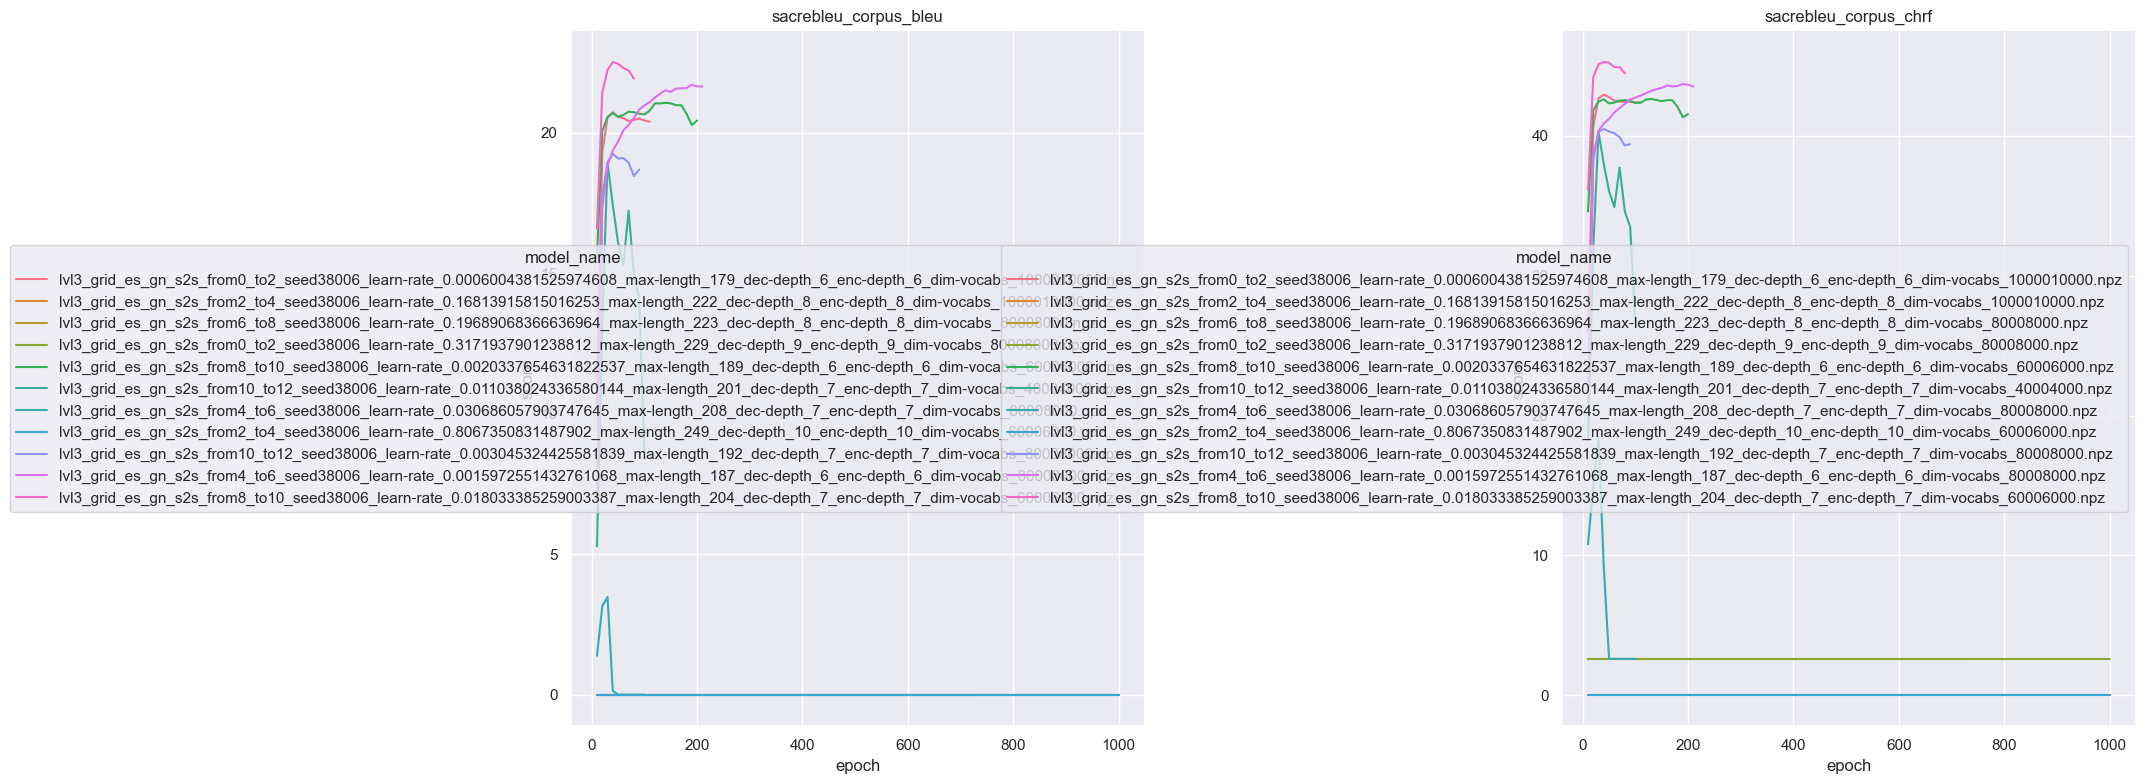

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


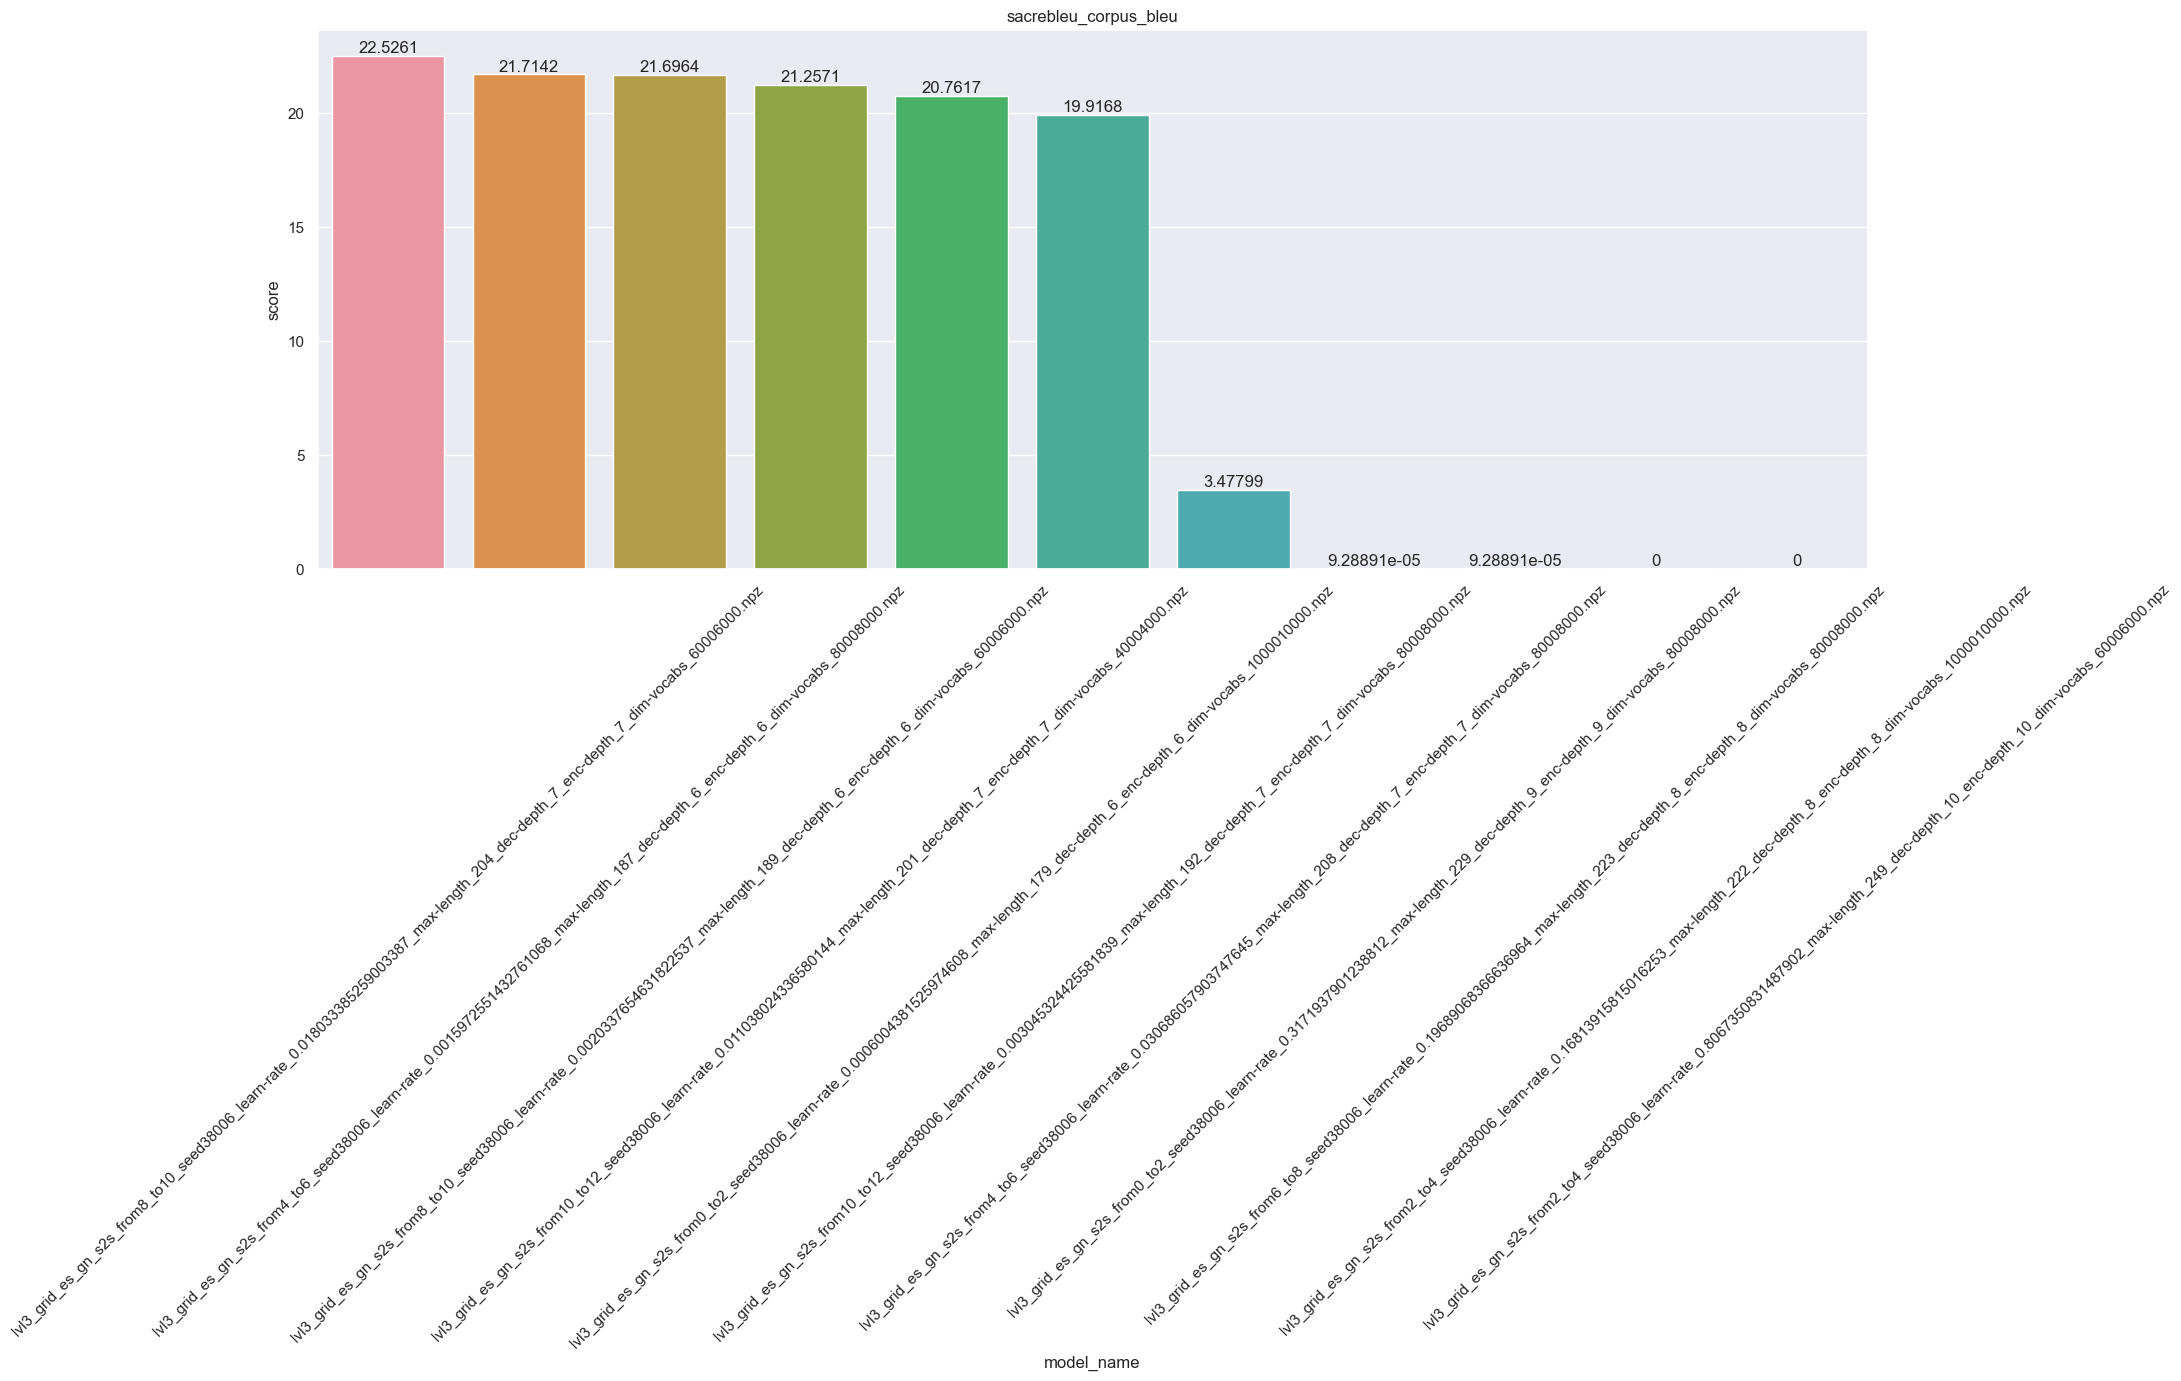

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:76: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


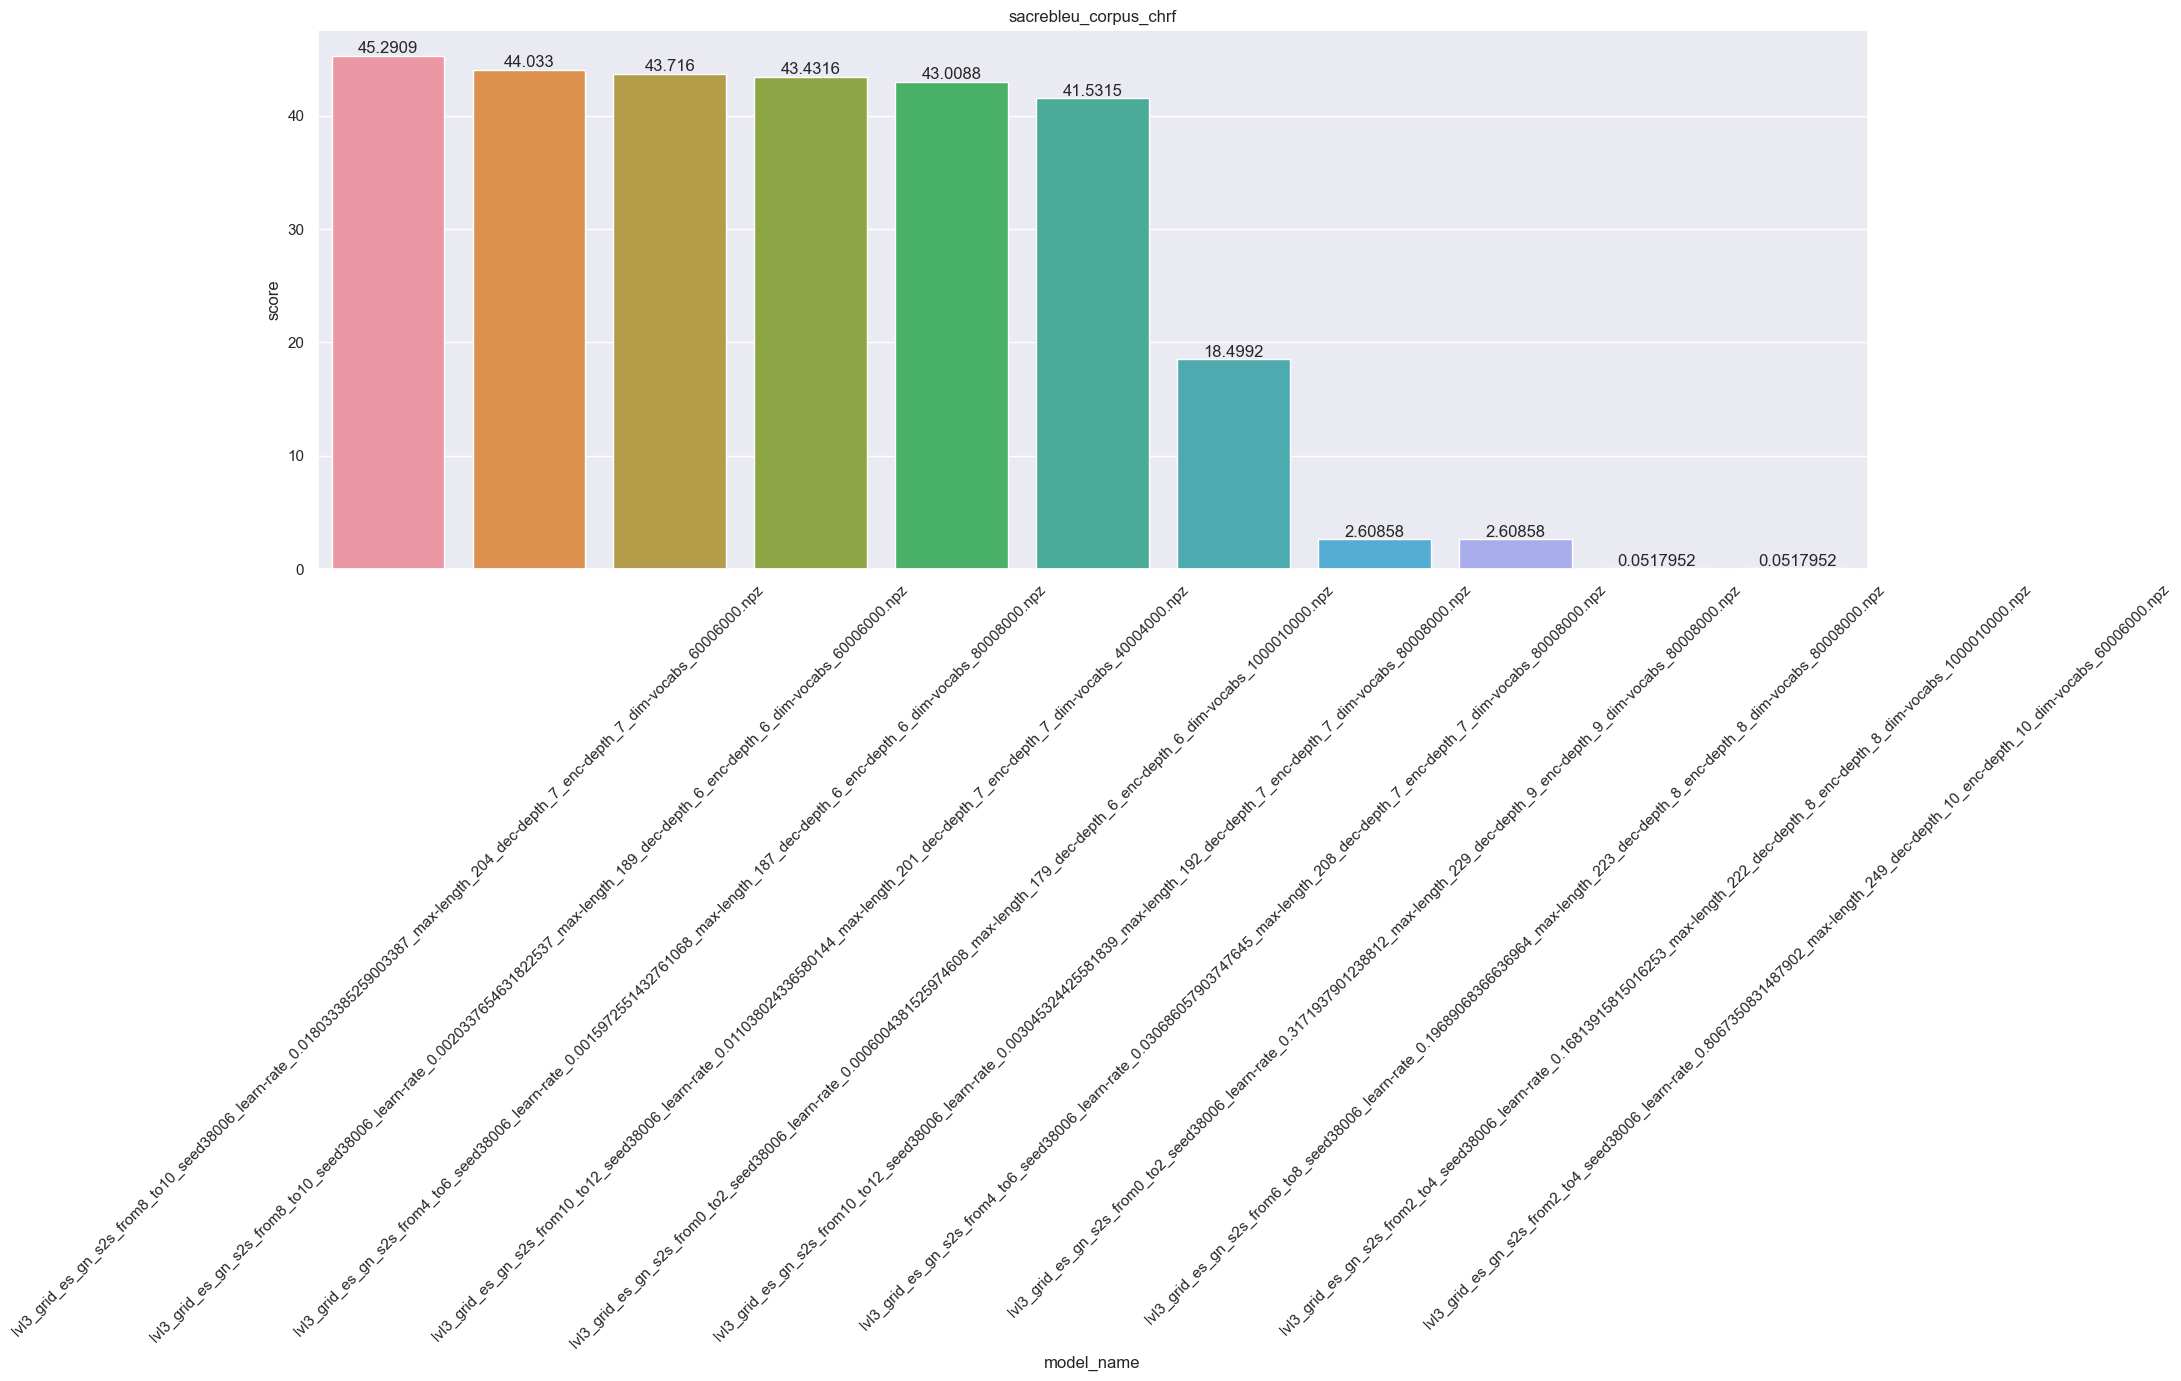

In [89]:
plots.plot_metric_by_epoch_foreach_model(lvl3_df_s2s_es_gn, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=(20,8));
plots.plot_max_score_by_model(lvl3_df_s2s_es_gn, metrics=['sacrebleu_corpus_bleu'], figsize=(20,7));
plots.plot_max_score_by_model(lvl3_df_s2s_es_gn, metrics=['sacrebleu_corpus_chrf'], figsize=(20,7));